<a href="https://colab.research.google.com/github/d982h8st7/DataAnalysis/blob/main/(tf_idf)for_Hackerton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q condacolab
import condacolab
condacolab.install()

‚ú®üç∞‚ú® Everything looks OK!


In [3]:
condacolab.check()

‚ú®üç∞‚ú® Everything looks OK!


In [ ]:
!conda install openmm
!conda env update -n base -f environment.yml

In [ ]:
!pip install tensorflow
!pip install keras
!pip install scikit-learn
!conda install gensim
!conda install seaborn
!conda install ipykernel
!conda install nltk
!conda install pandas
!conda install scipy
!conda install
!pip install -U pandas-profiling
!pip install konlpy
!pip install jupyter

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [20]:
!ls /usr/share/fonts/truetype/nanum

NanumBarunGothicBold.ttf	NanumGothicEcoR.ttf	       NanumPen.ttf
NanumBarunGothicLight.ttf	NanumGothicEco.ttf	       NanumSquare_acB.ttf
NanumBarunGothic.ttf		NanumGothicExtraBold.ttf       NanumSquare_acEB.ttf
NanumBarunGothicUltraLight.ttf	NanumGothicLight.ttf	       NanumSquare_acL.ttf
NanumBarunGothic-YetHangul.ttf	NanumGothic.ttf		       NanumSquare_acR.ttf
NanumBarunpenB.ttf		NanumMyeongjoBold.ttf	       NanumSquareB.ttf
NanumBarunpenR.ttf		NanumMyeongjoEcoBold.ttf       NanumSquareEB.ttf
NanumBrush.ttf			NanumMyeongjoEcoExtraBold.ttf  NanumSquareL.ttf
NanumGothicBold.ttf		NanumMyeongjoEcoR.ttf	       NanumSquareRoundB.ttf
NanumGothicCodingBold.ttf	NanumMyeongjoEco.ttf	       NanumSquareRoundEB.ttf
NanumGothicCoding.ttf		NanumMyeongjoExtraBold.ttf     NanumSquareRoundL.ttf
NanumGothicEcoBold.ttf		NanumMyeongjo.ttf	       NanumSquareRoundR.ttf
NanumGothicEcoExtraBold.ttf	NanumMyeongjo-YetHangul.ttf    NanumSquareR.ttf


In [23]:
import logging
import matplotlib
logging.getLogger("matplotlib").setLevel(logging.ERROR)

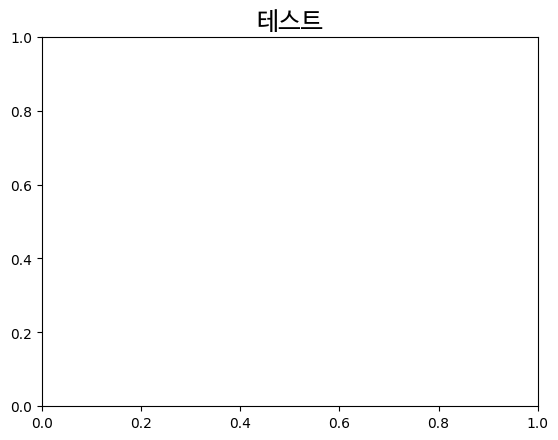

In [24]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

plt.title('ÌÖåÏä§Ìä∏', fontproperties=fontprop)
plt.show()

In [25]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy import *
from sklearn.model_selection import train_test_split

In [8]:
urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt",
     filename="ratings_total.txt")

('ratings_total.txt', <http.client.HTTPMessage at 0x7d7dcd08b010>)

In [26]:
total_data = pd.read_table('ratings_total.txt', names=['ratings', 'reviews'])
print('Ï†ÑÏ≤¥ Î¶¨Î∑∞ Í∞úÏàò :',len(total_data))

Ï†ÑÏ≤¥ Î¶¨Î∑∞ Í∞úÏàò : 200000


In [27]:
total_data[:5]

ratings                                            reviews
0        5                                            Î∞∞Í≥µÎπ†Î•¥Í≥† Íµø
1        2                      ÌÉùÎ∞∞Í∞Ä ÏóâÎßùÏù¥ÎÑ§Ïö© Ï†ÄÌù¨Ïßë Î∞ëÏóêÏ∏µÏóê ÎßêÎèÑÏóÜÏù¥ ÎÜîÎëêÍ≥†Í∞ÄÍ≥†
2        5  ÏïÑÏ£ºÏ¢ãÏïÑÏöî Î∞îÏßÄ Ï†ïÎßê Ï¢ãÏïÑÏÑú2Í∞ú Îçî Íµ¨Îß§ÌñàÏñ¥Ïöî Ïù¥Í∞ÄÍ≤©Ïóê ÎåÄÎ∞ïÏûÖÎãàÎã§. Î∞îÎäêÏßàÏù¥ Ï°∞Í∏à ...
3        2  ÏÑ†Î¨ºÏö©ÏúºÎ°ú Îπ®Î¶¨ Î∞õÏïÑÏÑú Ï†ÑÎã¨ÌñàÏñ¥Ïïº ÌïòÎäî ÏÉÅÌíàÏù¥ÏóàÎäîÎç∞ Î®∏Í∑∏ÏªµÎßå ÏôÄÏÑú ÎãπÌô©ÌñàÏäµÎãàÎã§. Ï†Ñ...
4        5                  ÎØºÌä∏ÏÉâÏÉÅ ÏòàÎªêÏöî. ÏòÜ ÏÜêÏû°Ïù¥Îäî Í±∞Îäî Ïö©ÎèÑÎ°úÎèÑ ÏÇ¨Ïö©ÎêòÎÑ§Ïöî „Öé„Öé

# Ï†ÑÏ≤òÎ¶¨ 1

## Setting lable

<Axes: xlabel='ratings'>

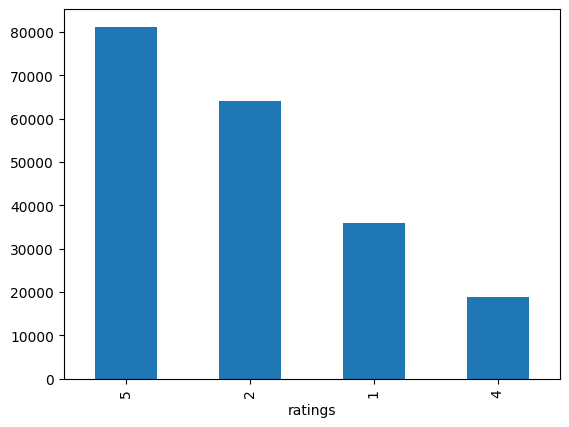

In [28]:
total_data['ratings'].value_counts().plot(kind = 'bar')

In [29]:
total_data['label'] = np.select([total_data.ratings > 3], [1], default=0)
total_data[:5]

ratings                                            reviews  label
0        5                                            Î∞∞Í≥µÎπ†Î•¥Í≥† Íµø      1
1        2                      ÌÉùÎ∞∞Í∞Ä ÏóâÎßùÏù¥ÎÑ§Ïö© Ï†ÄÌù¨Ïßë Î∞ëÏóêÏ∏µÏóê ÎßêÎèÑÏóÜÏù¥ ÎÜîÎëêÍ≥†Í∞ÄÍ≥†      0
2        5  ÏïÑÏ£ºÏ¢ãÏïÑÏöî Î∞îÏßÄ Ï†ïÎßê Ï¢ãÏïÑÏÑú2Í∞ú Îçî Íµ¨Îß§ÌñàÏñ¥Ïöî Ïù¥Í∞ÄÍ≤©Ïóê ÎåÄÎ∞ïÏûÖÎãàÎã§. Î∞îÎäêÏßàÏù¥ Ï°∞Í∏à ...      1
3        2  ÏÑ†Î¨ºÏö©ÏúºÎ°ú Îπ®Î¶¨ Î∞õÏïÑÏÑú Ï†ÑÎã¨ÌñàÏñ¥Ïïº ÌïòÎäî ÏÉÅÌíàÏù¥ÏóàÎäîÎç∞ Î®∏Í∑∏ÏªµÎßå ÏôÄÏÑú ÎãπÌô©ÌñàÏäµÎãàÎã§. Ï†Ñ...      0
4        5                  ÎØºÌä∏ÏÉâÏÉÅ ÏòàÎªêÏöî. ÏòÜ ÏÜêÏû°Ïù¥Îäî Í±∞Îäî Ïö©ÎèÑÎ°úÎèÑ ÏÇ¨Ïö©ÎêòÎÑ§Ïöî „Öé„Öé      1

## Refining

In [30]:
total_data['ratings'].nunique(), total_data['reviews'].nunique(), total_data['label'].nunique()

(4, 199908, 2)

In [31]:
total_data.drop_duplicates(subset=['reviews'], inplace=True)
print('Ï¥ù ÏÉòÌîåÏùò Ïàò :',len(total_data))

Ï¥ù ÏÉòÌîåÏùò Ïàò : 199908


In [32]:
print(total_data.isnull().values.any())

False


In [33]:
total_data['label'].value_counts()

label
0    99955
1    99953
Name: count, dtype: int64

In [34]:
print(total_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0  99955
1      1  99953


In [35]:
total_data['reviews'] = total_data['reviews'].str.replace("[^„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£ ]","")
total_data['reviews'].replace('', np.nan, inplace=True)
print(total_data.isnull().sum())

ratings    0
reviews    0
label      0
dtype: int64


In [36]:
total_data.drop_duplicates(subset = ['reviews'], inplace=True) # Ï§ëÎ≥µ Ï†úÍ±∞
total_data['reviews'] = total_data['reviews'].str.replace("[^„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£ ]","") # Ï†ïÍ∑ú ÌëúÌòÑÏãù ÏàòÌñâ
total_data['reviews'].replace('', np.nan, inplace=True) # Í≥µÎ∞±ÏùÄ Null Í∞íÏúºÎ°ú Î≥ÄÍ≤Ω
total_data = total_data.dropna(how='any') # Null Í∞í Ï†úÍ±∞
print('Ï†ÑÏ≤òÎ¶¨ ÌõÑ ÌÖåÏä§Ìä∏Ïö© ÏÉòÌîåÏùò Í∞úÏàò :',len(total_data))

Ï†ÑÏ≤òÎ¶¨ ÌõÑ ÌÖåÏä§Ìä∏Ïö© ÏÉòÌîåÏùò Í∞úÏàò : 199908


In [37]:
total_data

ratings                                            reviews  label
0             5                                            Î∞∞Í≥µÎπ†Î•¥Í≥† Íµø      1
1             2                      ÌÉùÎ∞∞Í∞Ä ÏóâÎßùÏù¥ÎÑ§Ïö© Ï†ÄÌù¨Ïßë Î∞ëÏóêÏ∏µÏóê ÎßêÎèÑÏóÜÏù¥ ÎÜîÎëêÍ≥†Í∞ÄÍ≥†      0
2             5  ÏïÑÏ£ºÏ¢ãÏïÑÏöî Î∞îÏßÄ Ï†ïÎßê Ï¢ãÏïÑÏÑú2Í∞ú Îçî Íµ¨Îß§ÌñàÏñ¥Ïöî Ïù¥Í∞ÄÍ≤©Ïóê ÎåÄÎ∞ïÏûÖÎãàÎã§. Î∞îÎäêÏßàÏù¥ Ï°∞Í∏à ...      1
3             2  ÏÑ†Î¨ºÏö©ÏúºÎ°ú Îπ®Î¶¨ Î∞õÏïÑÏÑú Ï†ÑÎã¨ÌñàÏñ¥Ïïº ÌïòÎäî ÏÉÅÌíàÏù¥ÏóàÎäîÎç∞ Î®∏Í∑∏ÏªµÎßå ÏôÄÏÑú ÎãπÌô©ÌñàÏäµÎãàÎã§. Ï†Ñ...      0
4             5                  ÎØºÌä∏ÏÉâÏÉÅ ÏòàÎªêÏöî. ÏòÜ ÏÜêÏû°Ïù¥Îäî Í±∞Îäî Ïö©ÎèÑÎ°úÎèÑ ÏÇ¨Ïö©ÎêòÎÑ§Ïöî „Öé„Öé      1
...         ...                                                ...    ...
199995        2                                    Ïû•ÎßàÎùºÍ∑∏Îü∞Í∞Ä!!! Îã¨ÏßÄÏïäÏïÑÏöî      0
199996        5  Îã§Ïù¥Ïä® ÏºÄÏù¥Ïä§ Íµ¨Îß§ÌñàÏñ¥Ïöî Îã§Ïù¥Ïä® ÏäàÌçºÏÜåÎãâ ÎìúÎùºÏù¥Í∏∞ ÏºÄÏù¥Ïä§ Íµ¨Îß§ÌñàÏñ¥ÏöîÍ∞ÄÍ≤© Í¥úÏ∞ÆÍ≥† Î∞∞ÏÜ°...      1
199997        5                    Î°úÎìúÏÉæÏóêÏÑú ÏÇ¨ÎäîÍ≤ÉÎ≥¥Îã§ ÏÑ∏Î∞∞ Ï†ÄÎ†¥ÌïòÎÑ§Ïöî „Öú„Öú ÏûêÏ£ºÏù¥Ïö©Ìï†ÍªòÏöî      1
199998        5                                      ÎÑòÏù¥ÏÅòÍ≥† ÏéÑÎ†®ÎêòÎ≥¥Ïù¥ÎÑ§Ïöî~      1
199999        5   ÏïÑÏßÅ ÏÇ¨Ïö©Ìï¥Î≥¥ÏßÄÎèÑÏïäÏïòÍ≥† Îã§Î•∏ Ï†úÌíàÏùÑ Ïç®Î≥∏Ï†ÅÏù¥ÏóÜÏñ¥ÏÑú Ïûò Î™®Î•¥Í≤†ÏßÄÎßå „Öé„Öé Î∞∞ÏÜ°ÏùÄ Îπ®ÎûêÏäµÎãàÎã§      1

[199908 rows x 3 columns]

## Stopword

In [38]:
stopwords = ['ÏïÑ', 'Ìú¥', 'ÏïÑÏù¥Íµ¨', 'ÏïÑÏù¥Ïø†', 'ÏïÑÏù¥Í≥†', 'Ïñ¥', 'ÎÇò', 'Ïö∞Î¶¨', 'Ï†ÄÌù¨', 'Îî∞Îùº',
             'ÏùòÌï¥', 'ÏùÑ', 'Î•º', 'Ïóê', 'Ïùò', 'Í∞Ä', 'ÏúºÎ°ú', 'Î°ú', 'ÏóêÍ≤å', 'ÎøêÏù¥Îã§', 'ÏùòÍ±∞ÌïòÏó¨',
             'Í∑ºÍ±∞ÌïòÏó¨', 'ÏûÖÍ∞ÅÌïòÏó¨', 'Í∏∞Ï§ÄÏúºÎ°ú', 'ÏòàÌïòÎ©¥', 'ÏòàÎ•º', 'Îì§Î©¥', 'ÏòàÎ•º', 'Îì§ÏûêÎ©¥',
             'Ï†Ä', 'ÏÜåÏù∏', 'ÏÜåÏÉù', 'Ï†ÄÌù¨', 'ÏßÄÎßêÍ≥†', 'ÌïòÏßÄÎßà', 'ÌïòÏßÄÎßàÎùº', 'Îã§Î•∏', 'Î¨ºÎ°†', 'ÎòêÌïú',
             'Í∑∏Î¶¨Í≥†', 'ÎπÑÍ∏∏Ïàò', 'ÏóÜÎã§', 'Ìï¥ÏÑúÎäî', 'ÏïàÎêúÎã§', 'ÎøêÎßå', 'ÏïÑÎãàÎùº', 'ÎßåÏù¥', 'ÏïÑÎãàÎã§', 'ÎßåÏùÄ',
             'ÏïÑÎãàÎã§', 'ÎßâÎ°†ÌïòÍ≥†', 'Í¥ÄÍ≥ÑÏóÜÏù¥', 'Í∑∏ÏπòÏßÄ', 'ÏïäÎã§', 'Í∑∏Îü¨ÎÇò', 'Í∑∏Îü∞Îç∞', 'ÌïòÏßÄÎßå', 'Îì†Í∞ÑÏóê',
             'ÎÖºÌïòÏßÄ', 'ÏïäÎã§', 'Îî∞ÏßÄÏßÄ', 'ÏïäÎã§', 'ÏÑ§ÏÇ¨', 'ÎπÑÎ°ù', 'ÎçîÎùºÎèÑ', 'ÏïÑÎãàÎ©¥', 'Îßå', 'Î™ªÌïòÎã§', 'ÌïòÎäî',
             'Ìé∏Ïù¥', 'ÎÇ´Îã§', 'Î∂àÎ¨∏ÌïòÍ≥†', 'Ìñ•ÌïòÏó¨', 'Ìñ•Ìï¥ÏÑú', 'Ìñ•ÌïòÎã§', 'Ï™ΩÏúºÎ°ú', 'ÌãàÌÉÄ', 'Ïù¥Ïö©ÌïòÏó¨', 'ÌÉÄÎã§',
             'Ïò§Î•¥Îã§', 'Ï†úÏô∏ÌïòÍ≥†', 'Ïù¥', 'Ïô∏Ïóê', 'Ïù¥', 'Î∞ñÏóê', 'ÌïòÏó¨Ïïº', 'ÎπÑÎ°úÏÜå', 'ÌïúÎã§Î©¥', 'Î™∞ÎùºÎèÑ', 'Ïô∏ÏóêÎèÑ',
             'Ïù¥Í≥≥', 'Ïó¨Í∏∞', 'Î∂ÄÌÑ∞', 'Í∏∞Ï†êÏúºÎ°ú', 'Îî∞ÎùºÏÑú', 'Ìï†', 'ÏÉùÍ∞ÅÏù¥Îã§', 'ÌïòÎ†§Í≥†ÌïòÎã§', 'Ïù¥Î¶¨ÌïòÏó¨', 'Í∑∏Î¶¨ÌïòÏó¨',
             'Í∑∏Î†áÍ≤å', 'Ìï®ÏúºÎ°úÏç®', 'ÌïòÏßÄÎßå', 'ÏùºÎïå', 'Ìï†Îïå', 'ÏïûÏóêÏÑú', 'Ï§ëÏóêÏÑú', 'Î≥¥ÎäîÎç∞ÏÑú', 'ÏúºÎ°úÏç®', 'Î°úÏç®',
             'ÍπåÏßÄ', 'Ìï¥ÏïºÌïúÎã§', 'ÏùºÍ≤ÉÏù¥Îã§', 'Î∞òÎìúÏãú', 'Ìï†Ï§ÑÏïåÎã§', 'Ìï†ÏàòÏûàÎã§', 'Ìï†ÏàòÏûàÏñ¥', 'ÏûÑÏóê', 'ÌãÄÎ¶ºÏóÜÎã§',
             'ÌïúÎã§Î©¥', 'Îì±', 'Îì±Îì±', 'Ï†ú', 'Í≤®Ïö∞', 'Îã®ÏßÄ', 'Îã§Îßå', 'Ìï†Îøê', 'Îî©Îèô', 'ÎåïÍ∑∏', 'ÎåÄÌï¥ÏÑú', 'ÎåÄÌïòÏó¨',
             'ÎåÄÌïòÎ©¥', 'Ìõ®Ïî¨', 'ÏñºÎßàÎÇò', 'ÏñºÎßàÎßåÌÅº', 'ÏñºÎßàÌÅº', 'ÎÇ®Ïßì', 'Ïó¨', 'ÏñºÎßàÍ∞Ñ', 'ÏïΩÍ∞Ñ', 'Îã§ÏÜå', 'Ï¢Ä', 'Ï°∞Í∏à',
             'Îã§Ïàò', 'Î™á', 'ÏñºÎßà', 'ÏßÄÎßå', 'ÌïòÎ¨ºÎ©∞', 'ÎòêÌïú', 'Í∑∏Îü¨ÎÇò', 'Í∑∏Î†áÏßÄÎßå', 'ÌïòÏßÄÎßå', 'Ïù¥Ïô∏ÏóêÎèÑ', 'ÎåÄÌï¥',
             'ÎßêÌïòÏûêÎ©¥', 'ÎøêÏù¥Îã§', 'Îã§ÏùåÏóê', 'Î∞òÎåÄÎ°ú', 'Î∞òÎåÄÎ°ú', 'ÎßêÌïòÏûêÎ©¥', 'Ïù¥ÏôÄ', 'Î∞òÎåÄÎ°ú', 'Î∞îÍæ∏Ïñ¥ÏÑú', 'ÎßêÌïòÎ©¥',
             'Î∞îÍæ∏Ïñ¥ÏÑú', 'ÌïúÎã§Î©¥', 'ÎßåÏïΩ', 'Í∑∏Î†áÏßÄÏïäÏúºÎ©¥', 'ÍπåÏïÖ', 'Ìà≠', 'Îî±', 'ÏÇêÍ±±Í±∞Î¶¨Îã§', 'Î≥¥ÎìúÎìù', 'ÎπÑÍ±±Í±∞Î¶¨Îã§',
             'ÍΩàÎãπ', 'ÏùëÎãπ', 'Ìï¥ÏïºÌïúÎã§', 'Ïóê', 'Í∞ÄÏÑú', 'Í∞Å', 'Í∞ÅÍ∞Å', 'Ïó¨Îü¨Î∂Ñ', 'Í∞ÅÏ¢Ö', 'Í∞ÅÏûê', 'Ï†úÍ∞ÅÍ∏∞', 'ÌïòÎèÑÎ°ùÌïòÎã§',
             'ÏôÄ', 'Í≥º', 'Í∑∏Îü¨ÎØÄÎ°ú', 'Í∑∏ÎûòÏÑú', 'Í≥†Î°ú', 'Ìïú', 'ÍπåÎã≠Ïóê', 'ÌïòÍ∏∞', 'ÎïåÎ¨∏Ïóê', 'Í±∞ÎãàÏôÄ', 'Ïù¥ÏßÄÎßå', 'ÎåÄÌïòÏó¨',
             'Í¥ÄÌïòÏó¨', 'Í¥ÄÌïú', 'Í≥ºÏó∞', 'Ïã§Î°ú', 'ÏïÑÎãàÎÇòÎã§Î•ºÍ∞Ä', 'ÏÉùÍ∞ÅÌïúÎåÄÎ°ú', 'ÏßÑÏßúÎ°ú', 'ÌïúÏ†ÅÏù¥ÏûàÎã§', 'ÌïòÍ≥§ÌïòÏòÄÎã§', 'Ìïò',
             'ÌïòÌïò', 'ÌóàÌóà', 'ÏïÑÌïò', 'Í±∞Î∞î', 'ÏôÄ', 'Ïò§', 'Ïôú', 'Ïñ¥Ïß∏ÏÑú', 'Î¨¥ÏóáÎïåÎ¨∏Ïóê', 'Ïñ¥Ï∞å', 'ÌïòÍ≤†ÎäîÍ∞Ä', 'Î¨¥Ïä®', 'Ïñ¥Îîî',
             'Ïñ¥ÎäêÍ≥≥', 'ÎçîÍµ∞Îã§ÎÇò', 'ÌïòÎ¨ºÎ©∞', 'ÎçîÏö±Ïù¥Îäî', 'Ïñ¥ÎäêÎïå', 'Ïñ∏Ï†ú', 'Ïïº', 'Ïù¥Î¥ê', 'Ïñ¥Ïù¥', 'Ïó¨Î≥¥ÏãúÏò§', 'ÌùêÌùê',
             'Ìù•', 'Ìú¥', 'ÌóâÌóâ', 'ÌóêÎñ°ÌóêÎñ°', 'ÏòÅÏ∞®', 'Ïó¨Ï∞®', 'Ïñ¥Í∏∞Ïó¨Ï∞®', 'ÎÅôÎÅô', 'ÏïÑÏïº', 'Ïïó', 'ÏïÑÏïº', 'ÏΩ∏ÏΩ∏',
             'Ï°∏Ï°∏', 'Ï¢çÏ¢ç', 'ÎöùÎöù', 'Ï£ºÎ£©Ï£ºÎ£©', 'ÏÜ®', 'Ïö∞Î•¥Î•¥', 'Í∑∏ÎûòÎèÑ', 'Îòê', 'Í∑∏Î¶¨Í≥†', 'Î∞îÍæ∏Ïñ¥ÎßêÌïòÎ©¥', 'Î∞îÍæ∏Ïñ¥ÎßêÌïòÏûêÎ©¥',
             'ÌòπÏùÄ', 'ÌòπÏãú', 'ÎãµÎã§', 'Î∞è', 'Í∑∏Ïóê', 'Îî∞Î•¥Îäî', 'ÎïåÍ∞Ä', 'ÎêòÏñ¥', 'Ï¶â', 'ÏßÄÎì†ÏßÄ', 'ÏÑ§Î†π', 'Í∞ÄÎ†π',
             'ÌïòÎçîÎùºÎèÑ', 'Ìï†ÏßÄÎùºÎèÑ', 'ÏùºÏßÄÎùºÎèÑ', 'ÏßÄÎì†ÏßÄ', 'Î™á', 'Í±∞Ïùò', 'ÌïòÎßàÌÑ∞Î©¥', 'Ïù∏Ï††', 'Ïù¥Ï††', 'ÎêúÎ∞îÏóêÏïº',
             'ÎêúÏù¥ÏÉÅ', 'ÎßåÌÅº', 'Ïñ¥Ï∞åÎêèÎì†', 'Í∑∏ÏúÑÏóê', 'Í≤åÎã§Í∞Ä', 'Ï†êÏóêÏÑú', 'Î≥¥ÏïÑ', 'ÎπÑÏ∂îÏñ¥', 'Î≥¥ÏïÑ', 'Í≥†Î†§ÌïòÎ©¥',
             'ÌïòÍ≤åÎê†Í≤ÉÏù¥Îã§', 'ÏùºÍ≤ÉÏù¥Îã§', 'ÎπÑÍµêÏ†Å', 'Ï¢Ä', 'Î≥¥Îã§Îçî', 'ÎπÑÌïòÎ©¥', 'ÏãúÌÇ§Îã§', 'ÌïòÍ≤åÌïòÎã§', 'Ìï†ÎßåÌïòÎã§',
             'ÏùòÌï¥ÏÑú', 'Ïó∞Ïù¥ÏÑú', 'Ïù¥Ïñ¥ÏÑú', 'ÏûáÎî∞Îùº', 'Îí§Îî∞Îùº', 'Îí§Ïù¥Ïñ¥', 'Í≤∞Íµ≠', 'ÏùòÏßÄÌïòÏó¨', 'Í∏∞ÎåÄÏó¨', 'ÌÜµÌïòÏó¨',
             'ÏûêÎßàÏûê', 'ÎçîÏö±Îçî', 'Î∂àÍµ¨ÌïòÍ≥†', 'ÏñºÎßàÎì†ÏßÄ', 'ÎßàÏùåÎåÄÎ°ú', 'Ï£ºÏ†ÄÌïòÏßÄ', 'ÏïäÍ≥†', 'Í≥ß', 'Ï¶âÏãú', 'Î∞îÎ°ú', 'ÎãπÏû•',
             'ÌïòÏûêÎßàÏûê', 'Î∞ñÏóê', 'ÏïàÎêúÎã§', 'ÌïòÎ©¥ÎêúÎã§', 'Í∑∏Îûò', 'Í∑∏Î†áÏßÄ', 'ÏöîÏª®ÎåÄ', 'Îã§Ïãú', 'ÎßêÌïòÏûêÎ©¥', 'Î∞îÍøî',
             'ÎßêÌïòÎ©¥', 'Ï¶â', 'Íµ¨Ï≤¥Ï†ÅÏúºÎ°ú', 'ÎßêÌïòÏûêÎ©¥', 'ÏãúÏûëÌïòÏó¨', 'ÏãúÏ¥àÏóê', 'Ïù¥ÏÉÅ', 'Ìóà', 'Ìóâ', 'ÌóàÍ±±', 'Î∞îÏôÄÍ∞ôÏù¥',
             'Ìï¥ÎèÑÏ¢ãÎã§', 'Ìï¥ÎèÑÎêúÎã§', 'Í≤åÎã§Í∞Ä', 'ÎçîÍµ¨ÎÇò', 'ÌïòÎ¨ºÎ©∞', 'ÏôÄÎ•¥Î•¥', 'Ìåç', 'ÌçΩ', 'ÌéÑÎ†Å', 'ÎèôÏïà', 'Ïù¥Îûò',
             'ÌïòÍ≥†ÏûàÏóàÎã§', 'Ïù¥ÏóàÎã§', 'ÏóêÏÑú', 'Î°úÎ∂ÄÌÑ∞', 'ÍπåÏßÄ', 'ÏòàÌïòÎ©¥', 'ÌñàÏñ¥Ïöî', 'Ìï¥Ïöî', 'Ìï®Íªò', 'Í∞ôÏù¥', 'ÎçîÎ∂àÏñ¥',
             'ÎßàÏ†Ä', 'ÎßàÏ†ÄÎèÑ', 'ÏñëÏûê', 'Î™®Îëê', 'ÏäµÎãàÎã§', 'Í∞ÄÍπåÏä§Î°ú', 'ÌïòÎ†§Í≥†ÌïòÎã§', 'Ï¶àÏùåÌïòÏó¨', 'Îã§Î•∏', 'Îã§Î•∏',
             'Î∞©Î©¥ÏúºÎ°ú', 'Ìï¥Î¥êÏöî', 'ÏäµÎãàÍπå', 'ÌñàÏñ¥Ïöî', 'ÎßêÌï†Í≤ÉÎèÑ', 'ÏóÜÍ≥†', 'Î¨¥Î¶éÏì∞Í≥†', 'Í∞úÏùòÏπòÏïäÍ≥†', 'ÌïòÎäîÍ≤ÉÎßå', 'Î™ªÌïòÎã§',
             'ÌïòÎäîÍ≤ÉÏù¥', 'ÎÇ´Îã§', 'Îß§', 'Îß§Î≤à', 'Îì§', 'Î™®', 'Ïñ¥ÎäêÍ≤É', 'Ïñ¥Îäê', 'Î°úÏç®', 'Í∞ñÍ≥†ÎßêÌïòÏûêÎ©¥', 'Ïñ¥Îîî', 'Ïñ¥ÎäêÏ™Ω',
             'Ïñ¥ÎäêÍ≤É', 'Ïñ¥ÎäêÌï¥', 'Ïñ¥Îäê', 'ÎÖÑÎèÑ', 'Îùº', 'Ìï¥ÎèÑ', 'Ïñ∏Ï††Í∞Ä', 'Ïñ¥Îñ§Í≤É', 'Ïñ¥ÎäêÍ≤É', 'Ï†ÄÍ∏∞', 'Ï†ÄÏ™Ω', 'Ï†ÄÍ≤É',
             'Í∑∏Îïå', 'Í∑∏Îüº', 'Í∑∏Îü¨Î©¥', 'ÏöîÎßåÌïúÍ±∏', 'Í∑∏Îûò', 'Í∑∏Îïå', 'Ï†ÄÍ≤ÉÎßåÌÅº', 'Í∑∏Ï†Ä', 'Ïù¥Î•¥Í∏∞ÍπåÏßÄ', 'Ìï†', 'Ï§Ñ', 'ÏïàÎã§',
             'Ìï†', 'ÌûòÏù¥', 'ÏûàÎã§', 'ÎÑà', 'ÎÑàÌù¨', 'ÎãπÏã†', 'Ïñ¥Ï∞å', 'ÏÑ§Îßà', 'Ï∞®ÎùºÎ¶¨', 'Ìï†ÏßÄÏñ∏Ï†ï', 'Ìï†ÏßÄÎùºÎèÑ',
             'Ìï†ÎßùÏ†ï', 'Ìï†ÏßÄÏñ∏Ï†ï', 'Íµ¨ÌÜ†ÌïòÎã§', 'Í≤åÏö∞Îã§', 'ÌÜ†ÌïòÎã§', 'Î©îÏì∞Í≤ÅÎã§', 'ÏòÜÏÇ¨Îûå', 'Ìâ§', 'Ï≥á', 'ÏùòÍ±∞ÌïòÏó¨',
             'Í∑ºÍ±∞ÌïòÏó¨', 'ÏùòÌï¥', 'Îî∞Îùº', 'ÌûòÏûÖÏñ¥', 'Í∑∏', 'Îã§Ïùå', 'Î≤ÑÍ∏à', 'ÎëêÎ≤àÏß∏Î°ú', 'Í∏∞ÌÉÄ', 'Ï≤´Î≤àÏß∏Î°ú', 'ÎÇòÎ®∏ÏßÄÎäî',
             'Í∑∏Ï§ëÏóêÏÑú', 'Í≤¨ÏßÄÏóêÏÑú', 'ÌòïÏãùÏúºÎ°ú', 'Ïì∞Ïó¨', 'ÏûÖÏû•ÏóêÏÑú', 'ÏúÑÌï¥ÏÑú', 'Îã®ÏßÄ', 'ÏùòÌï¥ÎêòÎã§', 'ÌïòÎèÑÎ°ùÏãúÌÇ§Îã§',
             'ÎøêÎßåÏïÑÎãàÎùº', 'Î∞òÎåÄÎ°ú', 'Ï†ÑÌõÑ', 'Ï†ÑÏûê', 'ÏïûÏùòÍ≤É', 'Ïû†Ïãú', 'Ïû†Íπê', 'ÌïòÎ©¥ÏÑú', 'Í∑∏Î†áÏßÄÎßå', 'Îã§ÏùåÏóê',
             'Í∑∏Îü¨ÌïúÏ¶â', 'Í∑∏Îü∞Ï¶â', 'ÎÇ®Îì§', 'ÏïÑÎ¨¥Í±∞ÎÇò', 'Ïñ¥Ï∞åÌïòÎì†ÏßÄ', 'Í∞ôÎã§', 'ÎπÑÏä∑ÌïòÎã§', 'ÏòàÏª®ÎåÄ', 'Ïù¥Îü¥Ï†ïÎèÑÎ°ú',
             'Ïñ¥ÎñªÍ≤å', 'ÎßåÏïΩ', 'ÎßåÏùº', 'ÏúÑÏóêÏÑú', 'ÏÑúÏà†ÌïúÎ∞îÏôÄÍ∞ôÏù¥', 'Ïù∏', 'ÎìØÌïòÎã§', 'ÌïòÏßÄ', 'ÏïäÎäîÎã§Î©¥', 'ÎßåÏïΩÏóê',
             'Î¨¥Ïóá', 'Î¨¥Ïä®', 'Ïñ¥Îäê', 'Ïñ¥Îñ§', 'ÏïÑÎûòÏúó', 'Ï°∞Ï∞®', 'ÌïúÎç∞', 'Í∑∏ÎüºÏóêÎèÑ', 'Î∂àÍµ¨ÌïòÍ≥†', 'Ïó¨Ï†ÑÌûà', 'Ïã¨ÏßÄÏñ¥',
             'ÍπåÏßÄÎèÑ', 'Ï°∞Ï∞®ÎèÑ', 'ÌïòÏßÄ', 'ÏïäÎèÑÎ°ù', 'ÏïäÍ∏∞', 'ÏúÑÌïòÏó¨', 'Îïå', 'ÏãúÍ∞Å', 'Î¨¥Î†µ', 'ÏãúÍ∞Ñ', 'ÎèôÏïà', 'Ïñ¥Îïå',
             'Ïñ¥Îñ†Ìïú', 'ÌïòÏó¨Í∏à', 'ÎÑ§', 'Ïòà', 'Ïö∞ÏÑ†', 'ÎàÑÍµ¨', 'ÎàÑÍ∞Ä', 'ÏïåÍ≤†ÎäîÍ∞Ä', 'ÏïÑÎ¨¥ÎèÑ', 'Ï§ÑÏùÄÎ™®Î•∏Îã§', 'Ï§ÑÏùÄ', 'Î™∞ÎûèÎã§',
             'ÌïòÎäî', 'ÍπÄÏóê', 'Í≤∏ÏÇ¨Í≤∏ÏÇ¨', 'ÌïòÎäîÎ∞î', 'Í∑∏Îü∞', 'ÍπåÎã≠Ïóê', 'Ìïú', 'Ïù¥Ïú†Îäî', 'Í∑∏Îü¨Îãà', 'Í∑∏Îü¨ÎãàÍπå', 'ÎïåÎ¨∏Ïóê', 'Í∑∏',
             'ÎÑàÌù¨', 'Í∑∏Îì§', 'ÎÑàÌù¨Îì§', 'ÌÉÄÏù∏', 'Í≤É', 'Í≤ÉÎì§', 'ÎÑà', 'ÏúÑÌïòÏó¨', 'Í≥µÎèôÏúºÎ°ú', 'ÎèôÏãúÏóê', 'ÌïòÍ∏∞', 'ÏúÑÌïòÏó¨',
             'Ïñ¥Ï∞åÌïòÏó¨', 'Î¨¥ÏóáÎïåÎ¨∏Ïóê', 'Î∂ïÎ∂ï', 'ÏúôÏúô', 'ÎÇò', 'Ïö∞Î¶¨', 'ÏóâÏóâ', 'ÌúòÏùµ', 'ÏúôÏúô', 'Ïò§Ìò∏', 'ÏïÑÌïò', 'Ïñ¥Ï®ãÎì†',
             'Îßå', 'Î™ªÌïòÎã§', 'ÌïòÍ∏∞Î≥¥Îã§Îäî', 'Ï∞®ÎùºÎ¶¨', 'ÌïòÎäî', 'Ìé∏Ïù¥', 'ÎÇ´Îã§', 'ÌùêÌùê', 'ÎÜÄÎùºÎã§', 'ÏÉÅÎåÄÏ†ÅÏúºÎ°ú', 'ÎßêÌïòÏûêÎ©¥',
             'ÎßàÏπò', 'ÏïÑÎãàÎùºÎ©¥', 'Ïâø', 'Í∑∏Î†áÏßÄ', 'ÏïäÏúºÎ©¥', 'Í∑∏Î†áÏßÄ', 'ÏïäÎã§Î©¥', 'Ïïà', 'Í∑∏Îü¨Î©¥', 'ÏïÑÎãàÏóàÎã§Î©¥', 'ÌïòÎì†ÏßÄ',
             'ÏïÑÎãàÎ©¥', 'Ïù¥ÎùºÎ©¥', 'Ï¢ãÏïÑ', 'ÏïåÏïòÏñ¥', 'ÌïòÎäîÍ≤ÉÎèÑ', 'Í∑∏ÎßåÏù¥Îã§', 'Ïñ¥Ï©îÏàò', 'ÏóÜÎã§', 'ÌïòÎÇò', 'Ïùº', 'ÏùºÎ∞òÏ†ÅÏúºÎ°ú',
             'ÏùºÎã®', 'ÌïúÏº†ÏúºÎ°úÎäî', 'Ïò§ÏûêÎßàÏûê', 'Ïù¥Î†áÍ≤åÎêòÎ©¥', 'Ïù¥ÏôÄÍ∞ôÎã§Î©¥', 'Ï†ÑÎ∂Ä', 'ÌïúÎßàÎîî', 'ÌïúÌï≠Î™©', 'Í∑ºÍ±∞Î°ú', 'ÌïòÍ∏∞Ïóê',
             'ÏïÑÏö∏Îü¨', 'ÌïòÏßÄ', 'ÏïäÎèÑÎ°ù', 'ÏïäÍ∏∞', 'ÏúÑÌï¥ÏÑú', 'Ïù¥Î•¥Í∏∞ÍπåÏßÄ', 'Ïù¥', 'ÎêòÎã§', 'Î°ú', 'Ïù∏ÌïòÏó¨', 'ÍπåÎã≠ÏúºÎ°ú',
             'Ïù¥Ïú†ÎßåÏúºÎ°ú', 'Ïù¥Î°ú', 'Ïù∏ÌïòÏó¨', 'Í∑∏ÎûòÏÑú', 'Ïù¥', 'ÎïåÎ¨∏Ïóê', 'Í∑∏Îü¨ÎØÄÎ°ú', 'Í∑∏Îü∞', 'ÍπåÎã≠Ïóê', 'Ïïå', 'Ïàò', 'ÏûàÎã§',
             'Í≤∞Î°†ÏùÑ', 'ÎÇº', 'Ïàò', 'ÏûàÎã§', 'ÏúºÎ°ú', 'Ïù∏ÌïòÏó¨', 'ÏûàÎã§', 'Ïñ¥Îñ§Í≤É', 'Í¥ÄÍ≥ÑÍ∞Ä', 'ÏûàÎã§', 'Í¥ÄÎ†®Ïù¥', 'ÏûàÎã§',
             'Ïó∞Í¥ÄÎêòÎã§', 'Ïñ¥Îñ§Í≤ÉÎì§', 'Ïóê', 'ÎåÄÌï¥', 'Ïù¥Î¶¨ÌïòÏó¨', 'Í∑∏Î¶¨ÌïòÏó¨', 'Ïó¨Î∂Ä', 'ÌïòÍ∏∞Î≥¥Îã§Îäî', 'ÌïòÎäêÎãà', 'ÌïòÎ©¥', 'Ìï†ÏàòÎ°ù',
             'Ïö¥Ïö¥', 'Ïù¥Îü¨Ïù¥Îü¨ÌïòÎã§', 'ÌïòÍµ¨ÎÇò', 'ÌïòÎèÑÎã§', 'Îã§ÏãúÎßêÌïòÎ©¥', 'Îã§ÏùåÏúºÎ°ú', 'Ïóê', 'ÏûàÎã§', 'Ïóê', 'Îã¨Î†§', 'ÏûàÎã§', 'Ïö∞Î¶¨',
             'Ïö∞Î¶¨Îì§', 'Ïò§ÌûàÎ†§', 'ÌïòÍ∏∞ÎäîÌïúÎç∞', 'Ïñ¥ÎñªÍ≤å', 'Ïñ¥ÎñªÌï¥', 'Ïñ¥Ï∞åÎêèÏñ¥', 'Ïñ¥Îïå', 'Ïñ¥Ïß∏ÏÑú', 'Î≥∏ÎåÄÎ°ú', 'Ïûê', 'Ïù¥',
             'Ïù¥Ï™Ω', 'Ïó¨Í∏∞', 'Ïù¥Í≤É', 'Ïù¥Î≤à', 'Ïù¥Î†áÍ≤åÎßêÌïòÏûêÎ©¥', 'Ïù¥Îü∞', 'Ïù¥Îü¨Ìïú', 'Ïù¥ÏôÄ', 'Í∞ôÏùÄ', 'ÏöîÎßåÌÅº', 'ÏöîÎßåÌïú', 'Í≤É',
             'ÏñºÎßà', 'Ïïà', 'ÎêòÎäî', 'Í≤É', 'Ïù¥ÎßåÌÅº', 'Ïù¥', 'Ï†ïÎèÑÏùò', 'Ïù¥Î†áÍ≤å', 'ÎßéÏùÄ', 'Í≤É', 'Ïù¥ÏôÄ', 'Í∞ôÎã§', 'Ïù¥Îïå', 'Ïù¥Î†áÍµ¨ÎÇò',
             'Í≤ÉÍ≥º', 'Í∞ôÏù¥', 'ÎÅºÏùµ', 'ÏÇêÍ±±', 'Îî∞ÏúÑ', 'ÏôÄ', 'Í∞ôÏùÄ', 'ÏÇ¨ÎûåÎì§', 'Î∂ÄÎ•òÏùò', 'ÏÇ¨ÎûåÎì§', 'ÏôúÎÉêÌïòÎ©¥', 'Ï§ëÏùòÌïòÎÇò', 'Ïò§ÏßÅ',
             'Ïò§Î°úÏßÄ', 'Ïóê', 'ÌïúÌïòÎã§', 'ÌïòÍ∏∞Îßå', 'ÌïòÎ©¥', 'ÎèÑÏ∞©ÌïòÎã§', 'ÍπåÏßÄ', 'ÎØ∏ÏπòÎã§', 'ÎèÑÎã¨ÌïòÎã§', 'Ï†ïÎèÑÏóê', 'Ïù¥Î•¥Îã§', 'Ìï†',
             'ÏßÄÍ≤ΩÏù¥Îã§', 'Í≤∞Í≥ºÏóê', 'Ïù¥Î•¥Îã§', 'Í¥ÄÌï¥ÏÑúÎäî', 'Ïó¨Îü¨Î∂Ñ', 'ÌïòÍ≥†', 'ÏûàÎã§', 'Ìïú', 'ÌõÑ', 'ÌòºÏûê', 'ÏûêÍ∏∞', 'ÏûêÍ∏∞Ïßë', 'ÏûêÏã†',
             'Ïö∞Ïóê', 'Ï¢ÖÌï©ÌïúÍ≤ÉÍ≥ºÍ∞ôÏù¥', 'Ï¥ùÏ†ÅÏúºÎ°ú', 'Î≥¥Î©¥', 'Ï¥ùÏ†ÅÏúºÎ°ú', 'ÎßêÌïòÎ©¥', 'Ï¥ùÏ†ÅÏúºÎ°ú', 'ÎåÄÎ°ú', 'ÌïòÎã§', 'ÏúºÎ°úÏÑú', 'Ï∞∏',
             'Í∑∏ÎßåÏù¥Îã§', 'Ìï†', 'Îî∞Î¶ÑÏù¥Îã§', 'Ïøµ', 'ÌÉïÌÉï', 'ÏæÖÏæÖ', 'Îë•Îë•', 'Î¥ê', 'Î¥êÎùº', 'ÏïÑÏù¥Ïïº', 'ÏïÑÎãà', 'ÏôÄÏïÑ', 'Ïùë', 'ÏïÑÏù¥',
             'Ï∞∏ÎÇò', 'ÎÖÑ', 'Ïõî', 'Ïùº', 'Î†π', 'ÏòÅ', 'Ïùº', 'Ïù¥', 'ÏÇº', 'ÏÇ¨', 'Ïò§', 'Ïú°', 'Î•ô', 'Ïπ†', 'Ìåî', 'Íµ¨', 'Ïù¥Ï≤úÏú°',
             'Ïù¥Ï≤úÏπ†', 'Ïù¥Ï≤úÌåî', 'Ïù¥Ï≤úÍµ¨', 'ÌïòÎÇò', 'Îëò', 'ÏÖã', 'ÎÑ∑', 'Îã§ÏÑØ', 'Ïó¨ÏÑØ', 'ÏùºÍ≥±', 'Ïó¨Îçü', 'ÏïÑÌôâ', 'Î†π', 'ÏòÅ']

In [48]:
len(stopwords)

789

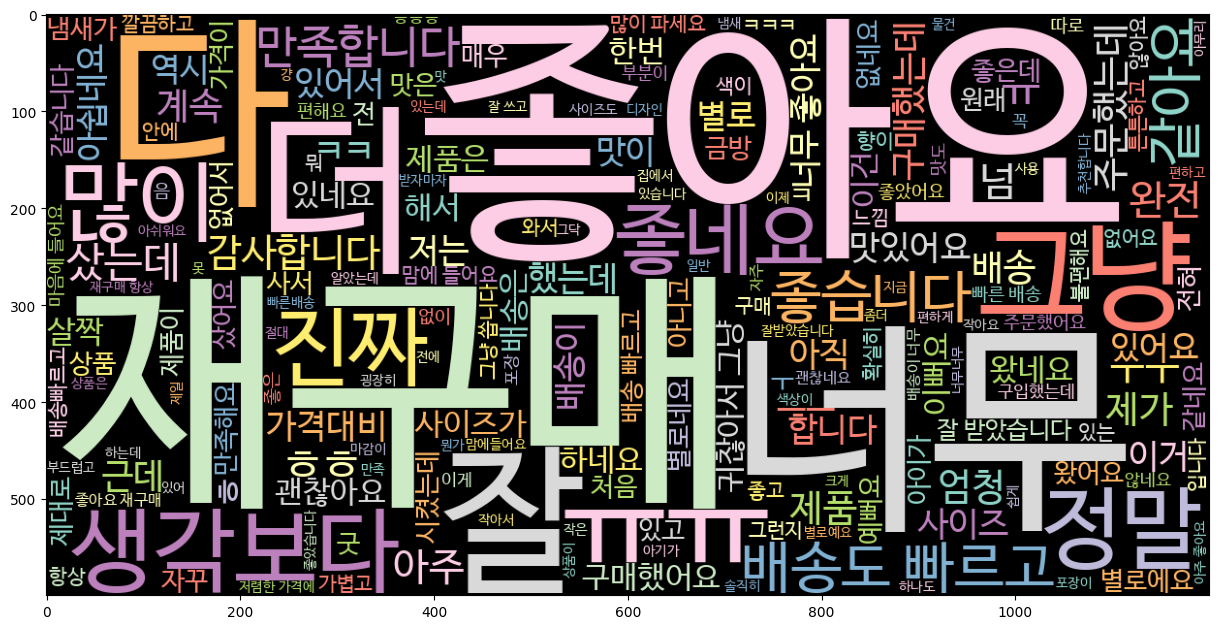

In [39]:
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

wordcloud1 = WordCloud(font_path='NanumBarunGothic.ttf',
                       stopwords = stopwords,
                       colormap='Set3',
                       background_color = 'black',
                       width = 1200, height = 600).generate(' '.join(total_data['reviews']))

plt.figure(figsize = (15, 20))
plt.imshow(wordcloud1)
plt.axis("on")
plt.show()

In [40]:
wordcloud1.to_svg()

'<svg xmlns="http://www.w3.org/2000/svg" width="1200" height="600">\n<style>text{font-family:\'NanumBarunGothic\';font-weight:normal;font-style:normal;}</style>\n<rect width="100%" height="100%" style="fill:black"></rect>\n<text transform="translate(388,217)" font-size="271" style="fill:rgb(252, 205, 229)">Ï¢ãÏïÑÏöî</text>\n<text transform="translate(15,476)" font-size="262" style="fill:rgb(204, 235, 197)">Ïû¨Íµ¨Îß§</text>\n<text transform="translate(705,504)" font-size="232" style="fill:rgb(217, 217, 217)">ÎÑàÎ¨¥</text>\n<text transform="translate(62,172)" font-size="211" style="fill:rgb(253, 180, 98)">Îã§</text>\n<text transform="translate(217,244)" font-size="188" style="fill:rgb(252, 205, 229)">Îçî</text>\n<text transform="translate(407,577)" font-size="166" style="fill:rgb(217, 217, 217)">Ïûò</text>\n<text transform="translate(962,311)" font-size="123" style="fill:rgb(251, 128, 114)">Í∑∏ÎÉ•</text>\n<text transform="translate(533,568)" font-size="120" style="fill:rgb(252, 205, 229)

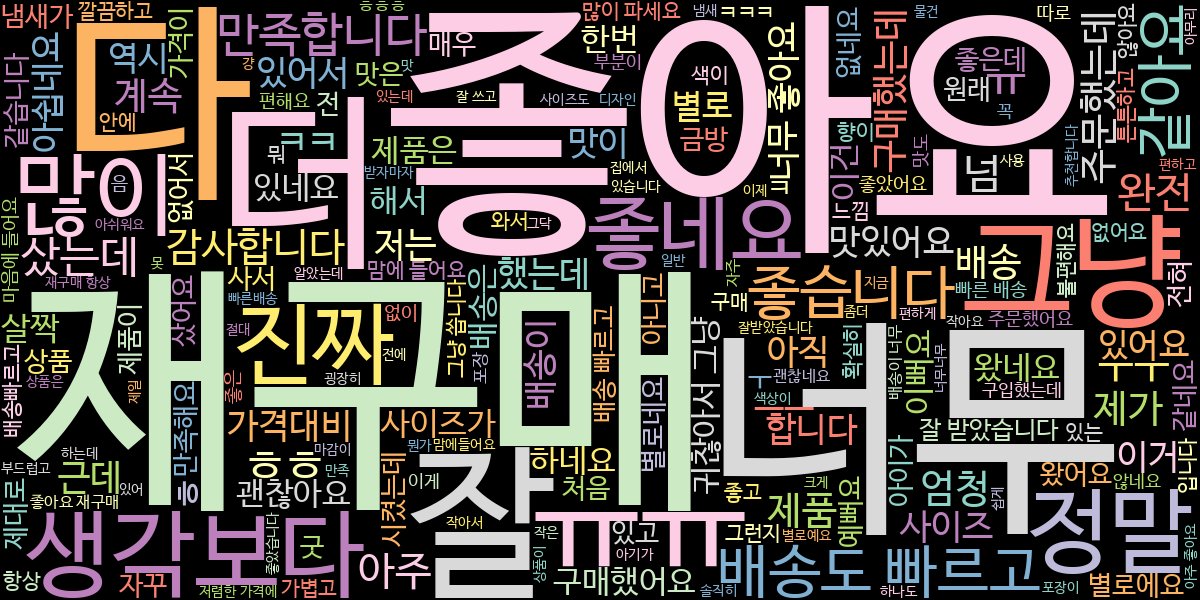

In [41]:
wordcloud1.to_image()

In [42]:
train_data, test_data = train_test_split(total_data,
                                         test_size = 0.1,
                                         random_state = 42)

print('ÌõàÎ†®Ïö© Î¶¨Î∑∞Ïùò Í∞úÏàò :', len(train_data))
print('ÌÖåÏä§Ìä∏Ïö© Î¶¨Î∑∞Ïùò Í∞úÏàò :', len(test_data))

ÌõàÎ†®Ïö© Î¶¨Î∑∞Ïùò Í∞úÏàò : 179917
ÌÖåÏä§Ìä∏Ïö© Î¶¨Î∑∞Ïùò Í∞úÏàò : 19991


## Check Lable spread

<Axes: xlabel='label'>

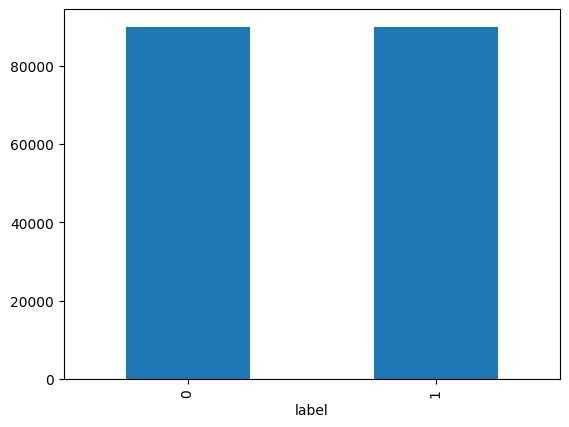

In [43]:
train_data['label'].value_counts().plot(kind = 'bar')

<Axes: xlabel='label'>

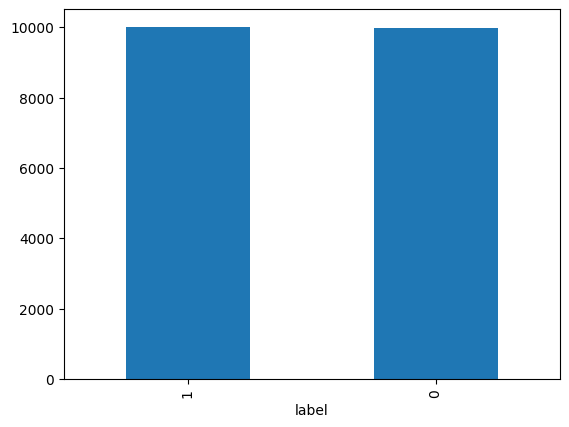

In [47]:
test_data['label'].value_counts().plot(kind = 'bar')

# Ï†ÑÏ≤òÎ¶¨2

In [44]:
from konlpy.tag import Okt
okt = Okt()
def okt_tokenizer(text):
    tokens = okt.morphs(text)
    return tokens

## TF-IDF

29Î∂Ñ 34Ï¥à Í±∏Î¶º

In [45]:
stopwords = ['ÏïÑ', 'Ìú¥', 'ÏïÑÏù¥Íµ¨', 'ÏïÑÏù¥Ïø†', 'ÏïÑÏù¥Í≥†', 'Ïñ¥', 'ÎÇò', 'Ïö∞Î¶¨', 'Ï†ÄÌù¨', 'Îî∞Îùº',
             'ÏùòÌï¥', 'ÏùÑ', 'Î•º', 'Ïóê', 'Ïùò', 'Í∞Ä', 'ÏúºÎ°ú', 'Î°ú', 'ÏóêÍ≤å', 'ÎøêÏù¥Îã§', 'ÏùòÍ±∞ÌïòÏó¨',
             'Í∑ºÍ±∞ÌïòÏó¨', 'ÏûÖÍ∞ÅÌïòÏó¨', 'Í∏∞Ï§ÄÏúºÎ°ú', 'ÏòàÌïòÎ©¥', 'ÏòàÎ•º', 'Îì§Î©¥', 'ÏòàÎ•º', 'Îì§ÏûêÎ©¥',
             'Ï†Ä', 'ÏÜåÏù∏', 'ÏÜåÏÉù', 'Ï†ÄÌù¨', 'ÏßÄÎßêÍ≥†', 'ÌïòÏßÄÎßà', 'ÌïòÏßÄÎßàÎùº', 'Îã§Î•∏', 'Î¨ºÎ°†', 'ÎòêÌïú',
             'Í∑∏Î¶¨Í≥†', 'ÎπÑÍ∏∏Ïàò', 'ÏóÜÎã§', 'Ìï¥ÏÑúÎäî', 'ÏïàÎêúÎã§', 'ÎøêÎßå', 'ÏïÑÎãàÎùº', 'ÎßåÏù¥', 'ÏïÑÎãàÎã§', 'ÎßåÏùÄ',
             'ÏïÑÎãàÎã§', 'ÎßâÎ°†ÌïòÍ≥†', 'Í¥ÄÍ≥ÑÏóÜÏù¥', 'Í∑∏ÏπòÏßÄ', 'ÏïäÎã§', 'Í∑∏Îü¨ÎÇò', 'Í∑∏Îü∞Îç∞', 'ÌïòÏßÄÎßå', 'Îì†Í∞ÑÏóê',
             'ÎÖºÌïòÏßÄ', 'ÏïäÎã§', 'Îî∞ÏßÄÏßÄ', 'ÏïäÎã§', 'ÏÑ§ÏÇ¨', 'ÎπÑÎ°ù', 'ÎçîÎùºÎèÑ', 'ÏïÑÎãàÎ©¥', 'Îßå', 'Î™ªÌïòÎã§', 'ÌïòÎäî',
             'Ìé∏Ïù¥', 'ÎÇ´Îã§', 'Î∂àÎ¨∏ÌïòÍ≥†', 'Ìñ•ÌïòÏó¨', 'Ìñ•Ìï¥ÏÑú', 'Ìñ•ÌïòÎã§', 'Ï™ΩÏúºÎ°ú', 'ÌãàÌÉÄ', 'Ïù¥Ïö©ÌïòÏó¨', 'ÌÉÄÎã§',
             'Ïò§Î•¥Îã§', 'Ï†úÏô∏ÌïòÍ≥†', 'Ïù¥', 'Ïô∏Ïóê', 'Ïù¥', 'Î∞ñÏóê', 'ÌïòÏó¨Ïïº', 'ÎπÑÎ°úÏÜå', 'ÌïúÎã§Î©¥', 'Î™∞ÎùºÎèÑ', 'Ïô∏ÏóêÎèÑ',
             'Ïù¥Í≥≥', 'Ïó¨Í∏∞', 'Î∂ÄÌÑ∞', 'Í∏∞Ï†êÏúºÎ°ú', 'Îî∞ÎùºÏÑú', 'Ìï†', 'ÏÉùÍ∞ÅÏù¥Îã§', 'ÌïòÎ†§Í≥†ÌïòÎã§', 'Ïù¥Î¶¨ÌïòÏó¨', 'Í∑∏Î¶¨ÌïòÏó¨',
             'Í∑∏Î†áÍ≤å', 'Ìï®ÏúºÎ°úÏç®', 'ÌïòÏßÄÎßå', 'ÏùºÎïå', 'Ìï†Îïå', 'ÏïûÏóêÏÑú', 'Ï§ëÏóêÏÑú', 'Î≥¥ÎäîÎç∞ÏÑú', 'ÏúºÎ°úÏç®', 'Î°úÏç®',
             'ÍπåÏßÄ', 'Ìï¥ÏïºÌïúÎã§', 'ÏùºÍ≤ÉÏù¥Îã§', 'Î∞òÎìúÏãú', 'Ìï†Ï§ÑÏïåÎã§', 'Ìï†ÏàòÏûàÎã§', 'Ìï†ÏàòÏûàÏñ¥', 'ÏûÑÏóê', 'ÌãÄÎ¶ºÏóÜÎã§',
             'ÌïúÎã§Î©¥', 'Îì±', 'Îì±Îì±', 'Ï†ú', 'Í≤®Ïö∞', 'Îã®ÏßÄ', 'Îã§Îßå', 'Ìï†Îøê', 'Îî©Îèô', 'ÎåïÍ∑∏', 'ÎåÄÌï¥ÏÑú', 'ÎåÄÌïòÏó¨',
             'ÎåÄÌïòÎ©¥', 'Ìõ®Ïî¨', 'ÏñºÎßàÎÇò', 'ÏñºÎßàÎßåÌÅº', 'ÏñºÎßàÌÅº', 'ÎÇ®Ïßì', 'Ïó¨', 'ÏñºÎßàÍ∞Ñ', 'ÏïΩÍ∞Ñ', 'Îã§ÏÜå', 'Ï¢Ä', 'Ï°∞Í∏à',
             'Îã§Ïàò', 'Î™á', 'ÏñºÎßà', 'ÏßÄÎßå', 'ÌïòÎ¨ºÎ©∞', 'ÎòêÌïú', 'Í∑∏Îü¨ÎÇò', 'Í∑∏Î†áÏßÄÎßå', 'ÌïòÏßÄÎßå', 'Ïù¥Ïô∏ÏóêÎèÑ', 'ÎåÄÌï¥',
             'ÎßêÌïòÏûêÎ©¥', 'ÎøêÏù¥Îã§', 'Îã§ÏùåÏóê', 'Î∞òÎåÄÎ°ú', 'Î∞òÎåÄÎ°ú', 'ÎßêÌïòÏûêÎ©¥', 'Ïù¥ÏôÄ', 'Î∞òÎåÄÎ°ú', 'Î∞îÍæ∏Ïñ¥ÏÑú', 'ÎßêÌïòÎ©¥',
             'Î∞îÍæ∏Ïñ¥ÏÑú', 'ÌïúÎã§Î©¥', 'ÎßåÏïΩ', 'Í∑∏Î†áÏßÄÏïäÏúºÎ©¥', 'ÍπåÏïÖ', 'Ìà≠', 'Îî±', 'ÏÇêÍ±±Í±∞Î¶¨Îã§', 'Î≥¥ÎìúÎìù', 'ÎπÑÍ±±Í±∞Î¶¨Îã§',
             'ÍΩàÎãπ', 'ÏùëÎãπ', 'Ìï¥ÏïºÌïúÎã§', 'Ïóê', 'Í∞ÄÏÑú', 'Í∞Å', 'Í∞ÅÍ∞Å', 'Ïó¨Îü¨Î∂Ñ', 'Í∞ÅÏ¢Ö', 'Í∞ÅÏûê', 'Ï†úÍ∞ÅÍ∏∞', 'ÌïòÎèÑÎ°ùÌïòÎã§',
             'ÏôÄ', 'Í≥º', 'Í∑∏Îü¨ÎØÄÎ°ú', 'Í∑∏ÎûòÏÑú', 'Í≥†Î°ú', 'Ìïú', 'ÍπåÎã≠Ïóê', 'ÌïòÍ∏∞', 'ÎïåÎ¨∏Ïóê', 'Í±∞ÎãàÏôÄ', 'Ïù¥ÏßÄÎßå', 'ÎåÄÌïòÏó¨',
             'Í¥ÄÌïòÏó¨', 'Í¥ÄÌïú', 'Í≥ºÏó∞', 'Ïã§Î°ú', 'ÏïÑÎãàÎÇòÎã§Î•ºÍ∞Ä', 'ÏÉùÍ∞ÅÌïúÎåÄÎ°ú', 'ÏßÑÏßúÎ°ú', 'ÌïúÏ†ÅÏù¥ÏûàÎã§', 'ÌïòÍ≥§ÌïòÏòÄÎã§', 'Ìïò',
             'ÌïòÌïò', 'ÌóàÌóà', 'ÏïÑÌïò', 'Í±∞Î∞î', 'ÏôÄ', 'Ïò§', 'Ïôú', 'Ïñ¥Ïß∏ÏÑú', 'Î¨¥ÏóáÎïåÎ¨∏Ïóê', 'Ïñ¥Ï∞å', 'ÌïòÍ≤†ÎäîÍ∞Ä', 'Î¨¥Ïä®', 'Ïñ¥Îîî',
             'Ïñ¥ÎäêÍ≥≥', 'ÎçîÍµ∞Îã§ÎÇò', 'ÌïòÎ¨ºÎ©∞', 'ÎçîÏö±Ïù¥Îäî', 'Ïñ¥ÎäêÎïå', 'Ïñ∏Ï†ú', 'Ïïº', 'Ïù¥Î¥ê', 'Ïñ¥Ïù¥', 'Ïó¨Î≥¥ÏãúÏò§', 'ÌùêÌùê',
             'Ìù•', 'Ìú¥', 'ÌóâÌóâ', 'ÌóêÎñ°ÌóêÎñ°', 'ÏòÅÏ∞®', 'Ïó¨Ï∞®', 'Ïñ¥Í∏∞Ïó¨Ï∞®', 'ÎÅôÎÅô', 'ÏïÑÏïº', 'Ïïó', 'ÏïÑÏïº', 'ÏΩ∏ÏΩ∏',
             'Ï°∏Ï°∏', 'Ï¢çÏ¢ç', 'ÎöùÎöù', 'Ï£ºÎ£©Ï£ºÎ£©', 'ÏÜ®', 'Ïö∞Î•¥Î•¥', 'Í∑∏ÎûòÎèÑ', 'Îòê', 'Í∑∏Î¶¨Í≥†', 'Î∞îÍæ∏Ïñ¥ÎßêÌïòÎ©¥', 'Î∞îÍæ∏Ïñ¥ÎßêÌïòÏûêÎ©¥',
             'ÌòπÏùÄ', 'ÌòπÏãú', 'ÎãµÎã§', 'Î∞è', 'Í∑∏Ïóê', 'Îî∞Î•¥Îäî', 'ÎïåÍ∞Ä', 'ÎêòÏñ¥', 'Ï¶â', 'ÏßÄÎì†ÏßÄ', 'ÏÑ§Î†π', 'Í∞ÄÎ†π',
             'ÌïòÎçîÎùºÎèÑ', 'Ìï†ÏßÄÎùºÎèÑ', 'ÏùºÏßÄÎùºÎèÑ', 'ÏßÄÎì†ÏßÄ', 'Î™á', 'Í±∞Ïùò', 'ÌïòÎßàÌÑ∞Î©¥', 'Ïù∏Ï††', 'Ïù¥Ï††', 'ÎêúÎ∞îÏóêÏïº',
             'ÎêúÏù¥ÏÉÅ', 'ÎßåÌÅº', 'Ïñ¥Ï∞åÎêèÎì†', 'Í∑∏ÏúÑÏóê', 'Í≤åÎã§Í∞Ä', 'Ï†êÏóêÏÑú', 'Î≥¥ÏïÑ', 'ÎπÑÏ∂îÏñ¥', 'Î≥¥ÏïÑ', 'Í≥†Î†§ÌïòÎ©¥',
             'ÌïòÍ≤åÎê†Í≤ÉÏù¥Îã§', 'ÏùºÍ≤ÉÏù¥Îã§', 'ÎπÑÍµêÏ†Å', 'Ï¢Ä', 'Î≥¥Îã§Îçî', 'ÎπÑÌïòÎ©¥', 'ÏãúÌÇ§Îã§', 'ÌïòÍ≤åÌïòÎã§', 'Ìï†ÎßåÌïòÎã§',
             'ÏùòÌï¥ÏÑú', 'Ïó∞Ïù¥ÏÑú', 'Ïù¥Ïñ¥ÏÑú', 'ÏûáÎî∞Îùº', 'Îí§Îî∞Îùº', 'Îí§Ïù¥Ïñ¥', 'Í≤∞Íµ≠', 'ÏùòÏßÄÌïòÏó¨', 'Í∏∞ÎåÄÏó¨', 'ÌÜµÌïòÏó¨',
             'ÏûêÎßàÏûê', 'ÎçîÏö±Îçî', 'Î∂àÍµ¨ÌïòÍ≥†', 'ÏñºÎßàÎì†ÏßÄ', 'ÎßàÏùåÎåÄÎ°ú', 'Ï£ºÏ†ÄÌïòÏßÄ', 'ÏïäÍ≥†', 'Í≥ß', 'Ï¶âÏãú', 'Î∞îÎ°ú', 'ÎãπÏû•',
             'ÌïòÏûêÎßàÏûê', 'Î∞ñÏóê', 'ÏïàÎêúÎã§', 'ÌïòÎ©¥ÎêúÎã§', 'Í∑∏Îûò', 'Í∑∏Î†áÏßÄ', 'ÏöîÏª®ÎåÄ', 'Îã§Ïãú', 'ÎßêÌïòÏûêÎ©¥', 'Î∞îÍøî',
             'ÎßêÌïòÎ©¥', 'Ï¶â', 'Íµ¨Ï≤¥Ï†ÅÏúºÎ°ú', 'ÎßêÌïòÏûêÎ©¥', 'ÏãúÏûëÌïòÏó¨', 'ÏãúÏ¥àÏóê', 'Ïù¥ÏÉÅ', 'Ìóà', 'Ìóâ', 'ÌóàÍ±±', 'Î∞îÏôÄÍ∞ôÏù¥',
             'Ìï¥ÎèÑÏ¢ãÎã§', 'Ìï¥ÎèÑÎêúÎã§', 'Í≤åÎã§Í∞Ä', 'ÎçîÍµ¨ÎÇò', 'ÌïòÎ¨ºÎ©∞', 'ÏôÄÎ•¥Î•¥', 'Ìåç', 'ÌçΩ', 'ÌéÑÎ†Å', 'ÎèôÏïà', 'Ïù¥Îûò',
             'ÌïòÍ≥†ÏûàÏóàÎã§', 'Ïù¥ÏóàÎã§', 'ÏóêÏÑú', 'Î°úÎ∂ÄÌÑ∞', 'ÍπåÏßÄ', 'ÏòàÌïòÎ©¥', 'ÌñàÏñ¥Ïöî', 'Ìï¥Ïöî', 'Ìï®Íªò', 'Í∞ôÏù¥', 'ÎçîÎ∂àÏñ¥',
             'ÎßàÏ†Ä', 'ÎßàÏ†ÄÎèÑ', 'ÏñëÏûê', 'Î™®Îëê', 'ÏäµÎãàÎã§', 'Í∞ÄÍπåÏä§Î°ú', 'ÌïòÎ†§Í≥†ÌïòÎã§', 'Ï¶àÏùåÌïòÏó¨', 'Îã§Î•∏', 'Îã§Î•∏',
             'Î∞©Î©¥ÏúºÎ°ú', 'Ìï¥Î¥êÏöî', 'ÏäµÎãàÍπå', 'ÌñàÏñ¥Ïöî', 'ÎßêÌï†Í≤ÉÎèÑ', 'ÏóÜÍ≥†', 'Î¨¥Î¶éÏì∞Í≥†', 'Í∞úÏùòÏπòÏïäÍ≥†', 'ÌïòÎäîÍ≤ÉÎßå', 'Î™ªÌïòÎã§',
             'ÌïòÎäîÍ≤ÉÏù¥', 'ÎÇ´Îã§', 'Îß§', 'Îß§Î≤à', 'Îì§', 'Î™®', 'Ïñ¥ÎäêÍ≤É', 'Ïñ¥Îäê', 'Î°úÏç®', 'Í∞ñÍ≥†ÎßêÌïòÏûêÎ©¥', 'Ïñ¥Îîî', 'Ïñ¥ÎäêÏ™Ω',
             'Ïñ¥ÎäêÍ≤É', 'Ïñ¥ÎäêÌï¥', 'Ïñ¥Îäê', 'ÎÖÑÎèÑ', 'Îùº', 'Ìï¥ÎèÑ', 'Ïñ∏Ï††Í∞Ä', 'Ïñ¥Îñ§Í≤É', 'Ïñ¥ÎäêÍ≤É', 'Ï†ÄÍ∏∞', 'Ï†ÄÏ™Ω', 'Ï†ÄÍ≤É',
             'Í∑∏Îïå', 'Í∑∏Îüº', 'Í∑∏Îü¨Î©¥', 'ÏöîÎßåÌïúÍ±∏', 'Í∑∏Îûò', 'Í∑∏Îïå', 'Ï†ÄÍ≤ÉÎßåÌÅº', 'Í∑∏Ï†Ä', 'Ïù¥Î•¥Í∏∞ÍπåÏßÄ', 'Ìï†', 'Ï§Ñ', 'ÏïàÎã§',
             'Ìï†', 'ÌûòÏù¥', 'ÏûàÎã§', 'ÎÑà', 'ÎÑàÌù¨', 'ÎãπÏã†', 'Ïñ¥Ï∞å', 'ÏÑ§Îßà', 'Ï∞®ÎùºÎ¶¨', 'Ìï†ÏßÄÏñ∏Ï†ï', 'Ìï†ÏßÄÎùºÎèÑ',
             'Ìï†ÎßùÏ†ï', 'Ìï†ÏßÄÏñ∏Ï†ï', 'Íµ¨ÌÜ†ÌïòÎã§', 'Í≤åÏö∞Îã§', 'ÌÜ†ÌïòÎã§', 'Î©îÏì∞Í≤ÅÎã§', 'ÏòÜÏÇ¨Îûå', 'Ìâ§', 'Ï≥á', 'ÏùòÍ±∞ÌïòÏó¨',
             'Í∑ºÍ±∞ÌïòÏó¨', 'ÏùòÌï¥', 'Îî∞Îùº', 'ÌûòÏûÖÏñ¥', 'Í∑∏', 'Îã§Ïùå', 'Î≤ÑÍ∏à', 'ÎëêÎ≤àÏß∏Î°ú', 'Í∏∞ÌÉÄ', 'Ï≤´Î≤àÏß∏Î°ú', 'ÎÇòÎ®∏ÏßÄÎäî',
             'Í∑∏Ï§ëÏóêÏÑú', 'Í≤¨ÏßÄÏóêÏÑú', 'ÌòïÏãùÏúºÎ°ú', 'Ïì∞Ïó¨', 'ÏûÖÏû•ÏóêÏÑú', 'ÏúÑÌï¥ÏÑú', 'Îã®ÏßÄ', 'ÏùòÌï¥ÎêòÎã§', 'ÌïòÎèÑÎ°ùÏãúÌÇ§Îã§',
             'ÎøêÎßåÏïÑÎãàÎùº', 'Î∞òÎåÄÎ°ú', 'Ï†ÑÌõÑ', 'Ï†ÑÏûê', 'ÏïûÏùòÍ≤É', 'Ïû†Ïãú', 'Ïû†Íπê', 'ÌïòÎ©¥ÏÑú', 'Í∑∏Î†áÏßÄÎßå', 'Îã§ÏùåÏóê',
             'Í∑∏Îü¨ÌïúÏ¶â', 'Í∑∏Îü∞Ï¶â', 'ÎÇ®Îì§', 'ÏïÑÎ¨¥Í±∞ÎÇò', 'Ïñ¥Ï∞åÌïòÎì†ÏßÄ', 'Í∞ôÎã§', 'ÎπÑÏä∑ÌïòÎã§', 'ÏòàÏª®ÎåÄ', 'Ïù¥Îü¥Ï†ïÎèÑÎ°ú',
             'Ïñ¥ÎñªÍ≤å', 'ÎßåÏïΩ', 'ÎßåÏùº', 'ÏúÑÏóêÏÑú', 'ÏÑúÏà†ÌïúÎ∞îÏôÄÍ∞ôÏù¥', 'Ïù∏', 'ÎìØÌïòÎã§', 'ÌïòÏßÄ', 'ÏïäÎäîÎã§Î©¥', 'ÎßåÏïΩÏóê',
             'Î¨¥Ïóá', 'Î¨¥Ïä®', 'Ïñ¥Îäê', 'Ïñ¥Îñ§', 'ÏïÑÎûòÏúó', 'Ï°∞Ï∞®', 'ÌïúÎç∞', 'Í∑∏ÎüºÏóêÎèÑ', 'Î∂àÍµ¨ÌïòÍ≥†', 'Ïó¨Ï†ÑÌûà', 'Ïã¨ÏßÄÏñ¥',
             'ÍπåÏßÄÎèÑ', 'Ï°∞Ï∞®ÎèÑ', 'ÌïòÏßÄ', 'ÏïäÎèÑÎ°ù', 'ÏïäÍ∏∞', 'ÏúÑÌïòÏó¨', 'Îïå', 'ÏãúÍ∞Å', 'Î¨¥Î†µ', 'ÏãúÍ∞Ñ', 'ÎèôÏïà', 'Ïñ¥Îïå',
             'Ïñ¥Îñ†Ìïú', 'ÌïòÏó¨Í∏à', 'ÎÑ§', 'Ïòà', 'Ïö∞ÏÑ†', 'ÎàÑÍµ¨', 'ÎàÑÍ∞Ä', 'ÏïåÍ≤†ÎäîÍ∞Ä', 'ÏïÑÎ¨¥ÎèÑ', 'Ï§ÑÏùÄÎ™®Î•∏Îã§', 'Ï§ÑÏùÄ', 'Î™∞ÎûèÎã§',
             'ÌïòÎäî', 'ÍπÄÏóê', 'Í≤∏ÏÇ¨Í≤∏ÏÇ¨', 'ÌïòÎäîÎ∞î', 'Í∑∏Îü∞', 'ÍπåÎã≠Ïóê', 'Ìïú', 'Ïù¥Ïú†Îäî', 'Í∑∏Îü¨Îãà', 'Í∑∏Îü¨ÎãàÍπå', 'ÎïåÎ¨∏Ïóê', 'Í∑∏',
             'ÎÑàÌù¨', 'Í∑∏Îì§', 'ÎÑàÌù¨Îì§', 'ÌÉÄÏù∏', 'Í≤É', 'Í≤ÉÎì§', 'ÎÑà', 'ÏúÑÌïòÏó¨', 'Í≥µÎèôÏúºÎ°ú', 'ÎèôÏãúÏóê', 'ÌïòÍ∏∞', 'ÏúÑÌïòÏó¨',
             'Ïñ¥Ï∞åÌïòÏó¨', 'Î¨¥ÏóáÎïåÎ¨∏Ïóê', 'Î∂ïÎ∂ï', 'ÏúôÏúô', 'ÎÇò', 'Ïö∞Î¶¨', 'ÏóâÏóâ', 'ÌúòÏùµ', 'ÏúôÏúô', 'Ïò§Ìò∏', 'ÏïÑÌïò', 'Ïñ¥Ï®ãÎì†',
             'Îßå', 'Î™ªÌïòÎã§', 'ÌïòÍ∏∞Î≥¥Îã§Îäî', 'Ï∞®ÎùºÎ¶¨', 'ÌïòÎäî', 'Ìé∏Ïù¥', 'ÎÇ´Îã§', 'ÌùêÌùê', 'ÎÜÄÎùºÎã§', 'ÏÉÅÎåÄÏ†ÅÏúºÎ°ú', 'ÎßêÌïòÏûêÎ©¥',
             'ÎßàÏπò', 'ÏïÑÎãàÎùºÎ©¥', 'Ïâø', 'Í∑∏Î†áÏßÄ', 'ÏïäÏúºÎ©¥', 'Í∑∏Î†áÏßÄ', 'ÏïäÎã§Î©¥', 'Ïïà', 'Í∑∏Îü¨Î©¥', 'ÏïÑÎãàÏóàÎã§Î©¥', 'ÌïòÎì†ÏßÄ',
             'ÏïÑÎãàÎ©¥', 'Ïù¥ÎùºÎ©¥', 'Ï¢ãÏïÑ', 'ÏïåÏïòÏñ¥', 'ÌïòÎäîÍ≤ÉÎèÑ', 'Í∑∏ÎßåÏù¥Îã§', 'Ïñ¥Ï©îÏàò', 'ÏóÜÎã§', 'ÌïòÎÇò', 'Ïùº', 'ÏùºÎ∞òÏ†ÅÏúºÎ°ú',
             'ÏùºÎã®', 'ÌïúÏº†ÏúºÎ°úÎäî', 'Ïò§ÏûêÎßàÏûê', 'Ïù¥Î†áÍ≤åÎêòÎ©¥', 'Ïù¥ÏôÄÍ∞ôÎã§Î©¥', 'Ï†ÑÎ∂Ä', 'ÌïúÎßàÎîî', 'ÌïúÌï≠Î™©', 'Í∑ºÍ±∞Î°ú', 'ÌïòÍ∏∞Ïóê',
             'ÏïÑÏö∏Îü¨', 'ÌïòÏßÄ', 'ÏïäÎèÑÎ°ù', 'ÏïäÍ∏∞', 'ÏúÑÌï¥ÏÑú', 'Ïù¥Î•¥Í∏∞ÍπåÏßÄ', 'Ïù¥', 'ÎêòÎã§', 'Î°ú', 'Ïù∏ÌïòÏó¨', 'ÍπåÎã≠ÏúºÎ°ú',
             'Ïù¥Ïú†ÎßåÏúºÎ°ú', 'Ïù¥Î°ú', 'Ïù∏ÌïòÏó¨', 'Í∑∏ÎûòÏÑú', 'Ïù¥', 'ÎïåÎ¨∏Ïóê', 'Í∑∏Îü¨ÎØÄÎ°ú', 'Í∑∏Îü∞', 'ÍπåÎã≠Ïóê', 'Ïïå', 'Ïàò', 'ÏûàÎã§',
             'Í≤∞Î°†ÏùÑ', 'ÎÇº', 'Ïàò', 'ÏûàÎã§', 'ÏúºÎ°ú', 'Ïù∏ÌïòÏó¨', 'ÏûàÎã§', 'Ïñ¥Îñ§Í≤É', 'Í¥ÄÍ≥ÑÍ∞Ä', 'ÏûàÎã§', 'Í¥ÄÎ†®Ïù¥', 'ÏûàÎã§',
             'Ïó∞Í¥ÄÎêòÎã§', 'Ïñ¥Îñ§Í≤ÉÎì§', 'Ïóê', 'ÎåÄÌï¥', 'Ïù¥Î¶¨ÌïòÏó¨', 'Í∑∏Î¶¨ÌïòÏó¨', 'Ïó¨Î∂Ä', 'ÌïòÍ∏∞Î≥¥Îã§Îäî', 'ÌïòÎäêÎãà', 'ÌïòÎ©¥', 'Ìï†ÏàòÎ°ù',
             'Ïö¥Ïö¥', 'Ïù¥Îü¨Ïù¥Îü¨ÌïòÎã§', 'ÌïòÍµ¨ÎÇò', 'ÌïòÎèÑÎã§', 'Îã§ÏãúÎßêÌïòÎ©¥', 'Îã§ÏùåÏúºÎ°ú', 'Ïóê', 'ÏûàÎã§', 'Ïóê', 'Îã¨Î†§', 'ÏûàÎã§', 'Ïö∞Î¶¨',
             'Ïö∞Î¶¨Îì§', 'Ïò§ÌûàÎ†§', 'ÌïòÍ∏∞ÎäîÌïúÎç∞', 'Ïñ¥ÎñªÍ≤å', 'Ïñ¥ÎñªÌï¥', 'Ïñ¥Ï∞åÎêèÏñ¥', 'Ïñ¥Îïå', 'Ïñ¥Ïß∏ÏÑú', 'Î≥∏ÎåÄÎ°ú', 'Ïûê', 'Ïù¥',
             'Ïù¥Ï™Ω', 'Ïó¨Í∏∞', 'Ïù¥Í≤É', 'Ïù¥Î≤à', 'Ïù¥Î†áÍ≤åÎßêÌïòÏûêÎ©¥', 'Ïù¥Îü∞', 'Ïù¥Îü¨Ìïú', 'Ïù¥ÏôÄ', 'Í∞ôÏùÄ', 'ÏöîÎßåÌÅº', 'ÏöîÎßåÌïú', 'Í≤É',
             'ÏñºÎßà', 'Ïïà', 'ÎêòÎäî', 'Í≤É', 'Ïù¥ÎßåÌÅº', 'Ïù¥', 'Ï†ïÎèÑÏùò', 'Ïù¥Î†áÍ≤å', 'ÎßéÏùÄ', 'Í≤É', 'Ïù¥ÏôÄ', 'Í∞ôÎã§', 'Ïù¥Îïå', 'Ïù¥Î†áÍµ¨ÎÇò',
             'Í≤ÉÍ≥º', 'Í∞ôÏù¥', 'ÎÅºÏùµ', 'ÏÇêÍ±±', 'Îî∞ÏúÑ', 'ÏôÄ', 'Í∞ôÏùÄ', 'ÏÇ¨ÎûåÎì§', 'Î∂ÄÎ•òÏùò', 'ÏÇ¨ÎûåÎì§', 'ÏôúÎÉêÌïòÎ©¥', 'Ï§ëÏùòÌïòÎÇò', 'Ïò§ÏßÅ',
             'Ïò§Î°úÏßÄ', 'Ïóê', 'ÌïúÌïòÎã§', 'ÌïòÍ∏∞Îßå', 'ÌïòÎ©¥', 'ÎèÑÏ∞©ÌïòÎã§', 'ÍπåÏßÄ', 'ÎØ∏ÏπòÎã§', 'ÎèÑÎã¨ÌïòÎã§', 'Ï†ïÎèÑÏóê', 'Ïù¥Î•¥Îã§', 'Ìï†',
             'ÏßÄÍ≤ΩÏù¥Îã§', 'Í≤∞Í≥ºÏóê', 'Ïù¥Î•¥Îã§', 'Í¥ÄÌï¥ÏÑúÎäî', 'Ïó¨Îü¨Î∂Ñ', 'ÌïòÍ≥†', 'ÏûàÎã§', 'Ìïú', 'ÌõÑ', 'ÌòºÏûê', 'ÏûêÍ∏∞', 'ÏûêÍ∏∞Ïßë', 'ÏûêÏã†',
             'Ïö∞Ïóê', 'Ï¢ÖÌï©ÌïúÍ≤ÉÍ≥ºÍ∞ôÏù¥', 'Ï¥ùÏ†ÅÏúºÎ°ú', 'Î≥¥Î©¥', 'Ï¥ùÏ†ÅÏúºÎ°ú', 'ÎßêÌïòÎ©¥', 'Ï¥ùÏ†ÅÏúºÎ°ú', 'ÎåÄÎ°ú', 'ÌïòÎã§', 'ÏúºÎ°úÏÑú', 'Ï∞∏',
             'Í∑∏ÎßåÏù¥Îã§', 'Ìï†', 'Îî∞Î¶ÑÏù¥Îã§', 'Ïøµ', 'ÌÉïÌÉï', 'ÏæÖÏæÖ', 'Îë•Îë•', 'Î¥ê', 'Î¥êÎùº', 'ÏïÑÏù¥Ïïº', 'ÏïÑÎãà', 'ÏôÄÏïÑ', 'Ïùë', 'ÏïÑÏù¥',
             'Ï∞∏ÎÇò', 'ÎÖÑ', 'Ïõî', 'Ïùº', 'Î†π', 'ÏòÅ', 'Ïùº', 'Ïù¥', 'ÏÇº', 'ÏÇ¨', 'Ïò§', 'Ïú°', 'Î•ô', 'Ïπ†', 'Ìåî', 'Íµ¨', 'Ïù¥Ï≤úÏú°',
             'Ïù¥Ï≤úÏπ†', 'Ïù¥Ï≤úÌåî', 'Ïù¥Ï≤úÍµ¨', 'ÌïòÎÇò', 'Îëò', 'ÏÖã', 'ÎÑ∑', 'Îã§ÏÑØ', 'Ïó¨ÏÑØ', 'ÏùºÍ≥±', 'Ïó¨Îçü', 'ÏïÑÌôâ', 'Î†π', 'ÏòÅ']

In [ ]:
# ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä, TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
import time

tfidf = TfidfVectorizer(tokenizer=okt_tokenizer,
                        stop_words=stopwords,
                        ngram_range=(1,3),
                        min_df=3,
                        max_df=0.90)

tfidf.fit(total_data['reviews'])
train_tfidf = tfidf.transform(train_data['reviews'])
test_tfidf = tfidf.transform(test_data['reviews'])

In [49]:
train_data

ratings                                            reviews  label
19582         2                                             Î∞∞ÏÜ° Í∞úÎä¶Ïùå      0
7259          1  ÎßàÍ∞êÏù¥ ÌóàÏà†Ìï©ÎãàÎã§ ÏÇ¨Ìè¨Í∞ÄÏóÜÏñ¥ÏÑú Ïö∞ÏÑ† ÌÉúÏûéÎ∂ôÏó¨ÎÜ®Ïñ¥Ïöî Î™®ÏÑúÎ¶¨Í∞Ä ÎÇ†Ïπ¥Î°≠ÎèÑ Ï°∞Í∏à Íπ®ÏßÑÎ∂ÄÎ∂ÑÎèÑ...      0
4207          5                                      ÏïÑÏ£º ÎßåÏ°±Ïä§Îü¨ÏõåÏö© Îã®Îã®Ìï®      1
150860        2                                         ÏÇ¨Ïù¥Ï¶àÍ∞ÄÏïàÎßûÎäêÎùºÎ≤ºÏó¨      0
36853         1                                Ìö®Í≥ºÏóÜÏñ¥Ïöî Î®πÍ≥†Í¥úÌûà Ïû†ÎèÑÏïàÏò§ÎäîÎäêÎÇåÏûÑ      0
...         ...                                                ...    ...
119904        2  Í∑∏ÎÉ•Í∑∏ÎûòÏöî „Ñ∑„Ñ∑„Ñ∑„Ñ∑ „ÖÇ„ÖÇ„ÖÇ„ÖÇ Í∑∏ÎÉ•Í∑∏ÎûòÏöî „Ñ∑„Ñ∑„Ñ∑„Ñ∑ „ÖÇ„ÖÇ„ÖÇ„ÖÇ „ÖÅ„ÖÅ„ÖÅ„ÖÅ „Öã„Öã„Öã„Öã „Öå„Öå„Öå„Öå...      0
103714        2  ÎπÑÏã∏Ïöî ÏßÑÏßú Î≥ÑÍ±∞ ÏïÑÎãàÍ≤å ÌóàÏ†ëÌïòÍ≤å ÏÉùÍ≤ºÎäîÎç∞ Ïù¥Í≤å Ïù¥ÎßåÏõêÏù¥ÎùºÎãà ÏßÑÏßú Í∞ÄÎ∞© Íµ¨Í≤®ÏßÄÎäîÍ≤ÉÎßå...      0
131960        2                             100Ïû• Ï£ºÎ¨∏ ÏïàÎê©ÎãàÎã§ 500Ïû• Í∞ÄÎä•Ìï¥Ïöî      0
146908        5  . ÌïòÎ¶ºÏπòÌÇ® Ïó¨Í∏∞ÏÑú Íµ¨ÏûÖÌïòÎãà ÏóÑÏ≤≠ Ï†ÄÎ†¥ÌïòÎÑ§Ïöî Î∞∞ÏÜ°ÎèÑ ÏæÖÍΩù ÏñºÏñ¥ÏÑú ÎèÑÏ∞©ÌïòÍ≥† ÏïÑÏ£º ÎßåÏ°±...      1
121984        4                               Ï°∞Í∏à ÏïΩÌï¥Î≥¥Ïù¥ÎäîÎç∞ Ï†ÄÎ†¥ÌïòÍ≤å Ïûò ÏÇøÏñ¥Ïöî      1

[179917 rows x 3 columns]

In [50]:
tfidf_vocab = pd.DataFrame(sorted(tfidf.vocabulary_.items()),
                           columns=['vocab','counts'])
tfidf_vocab.to_csv('tfidf_vocabulary_items.csv')
tfidf_vocab

vocab  counts
0          !       0
1        ! !       1
2        ! (       2
3        ! .       3
4       ! ..       4
...      ...     ...
197014     ü§î  197014
197015     ü§ó  197015
197016     ü§£  197016
197017     ü§¨  197017
197018     ü•∞  197018

[197019 rows x 2 columns]

In [51]:
train_data

ratings                                            reviews  label
19582         2                                             Î∞∞ÏÜ° Í∞úÎä¶Ïùå      0
7259          1  ÎßàÍ∞êÏù¥ ÌóàÏà†Ìï©ÎãàÎã§ ÏÇ¨Ìè¨Í∞ÄÏóÜÏñ¥ÏÑú Ïö∞ÏÑ† ÌÉúÏûéÎ∂ôÏó¨ÎÜ®Ïñ¥Ïöî Î™®ÏÑúÎ¶¨Í∞Ä ÎÇ†Ïπ¥Î°≠ÎèÑ Ï°∞Í∏à Íπ®ÏßÑÎ∂ÄÎ∂ÑÎèÑ...      0
4207          5                                      ÏïÑÏ£º ÎßåÏ°±Ïä§Îü¨ÏõåÏö© Îã®Îã®Ìï®      1
150860        2                                         ÏÇ¨Ïù¥Ï¶àÍ∞ÄÏïàÎßûÎäêÎùºÎ≤ºÏó¨      0
36853         1                                Ìö®Í≥ºÏóÜÏñ¥Ïöî Î®πÍ≥†Í¥úÌûà Ïû†ÎèÑÏïàÏò§ÎäîÎäêÎÇåÏûÑ      0
...         ...                                                ...    ...
119904        2  Í∑∏ÎÉ•Í∑∏ÎûòÏöî „Ñ∑„Ñ∑„Ñ∑„Ñ∑ „ÖÇ„ÖÇ„ÖÇ„ÖÇ Í∑∏ÎÉ•Í∑∏ÎûòÏöî „Ñ∑„Ñ∑„Ñ∑„Ñ∑ „ÖÇ„ÖÇ„ÖÇ„ÖÇ „ÖÅ„ÖÅ„ÖÅ„ÖÅ „Öã„Öã„Öã„Öã „Öå„Öå„Öå„Öå...      0
103714        2  ÎπÑÏã∏Ïöî ÏßÑÏßú Î≥ÑÍ±∞ ÏïÑÎãàÍ≤å ÌóàÏ†ëÌïòÍ≤å ÏÉùÍ≤ºÎäîÎç∞ Ïù¥Í≤å Ïù¥ÎßåÏõêÏù¥ÎùºÎãà ÏßÑÏßú Í∞ÄÎ∞© Íµ¨Í≤®ÏßÄÎäîÍ≤ÉÎßå...      0
131960        2                             100Ïû• Ï£ºÎ¨∏ ÏïàÎê©ÎãàÎã§ 500Ïû• Í∞ÄÎä•Ìï¥Ïöî      0
146908        5  . ÌïòÎ¶ºÏπòÌÇ® Ïó¨Í∏∞ÏÑú Íµ¨ÏûÖÌïòÎãà ÏóÑÏ≤≠ Ï†ÄÎ†¥ÌïòÎÑ§Ïöî Î∞∞ÏÜ°ÎèÑ ÏæÖÍΩù ÏñºÏñ¥ÏÑú ÎèÑÏ∞©ÌïòÍ≥† ÏïÑÏ£º ÎßåÏ°±...      1
121984        4                               Ï°∞Í∏à ÏïΩÌï¥Î≥¥Ïù¥ÎäîÎç∞ Ï†ÄÎ†¥ÌïòÍ≤å Ïûò ÏÇøÏñ¥Ïöî      1

[179917 rows x 3 columns]

In [52]:
tfidf_vocab = pd.DataFrame(sorted(tfidf.vocabulary_.items()),
                           columns=['vocab','counts'])
tfidf_vocab.to_csv('tfidf_vocabulary_items.csv')
tfidf_vocab

vocab  counts
0          !       0
1        ! !       1
2        ! (       2
3        ! .       3
4       ! ..       4
...      ...     ...
197014     ü§î  197014
197015     ü§ó  197015
197016     ü§£  197016
197017     ü§¨  197017
197018     ü•∞  197018

[197019 rows x 2 columns]

# Modeling

In [53]:
!pip install plotly

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 15.6/15.6 MB 96.5 MB/s eta 0:00:00


In [54]:
y_train = train_data['label']
y_test = test_data['label']

In [ ]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Logistic Regression

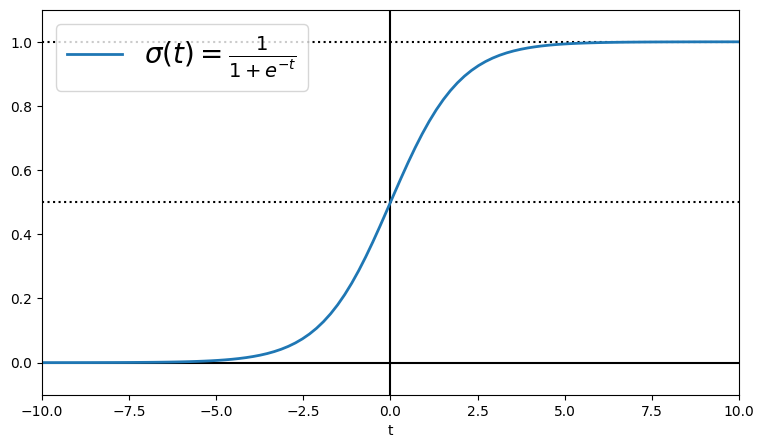

In [58]:
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 5))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.style.use('dark_background')
plt.show()

## Decision boundary with iris data

In [59]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [60]:
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(int)

In [61]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

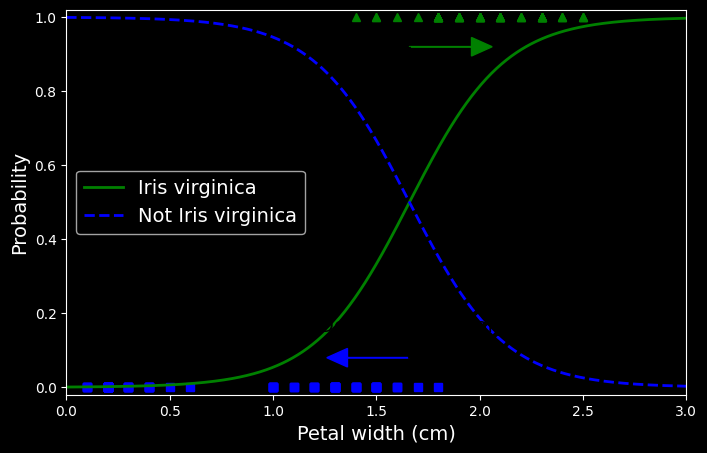

In [62]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 5))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary[0], 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary[0], 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])

plt.show()

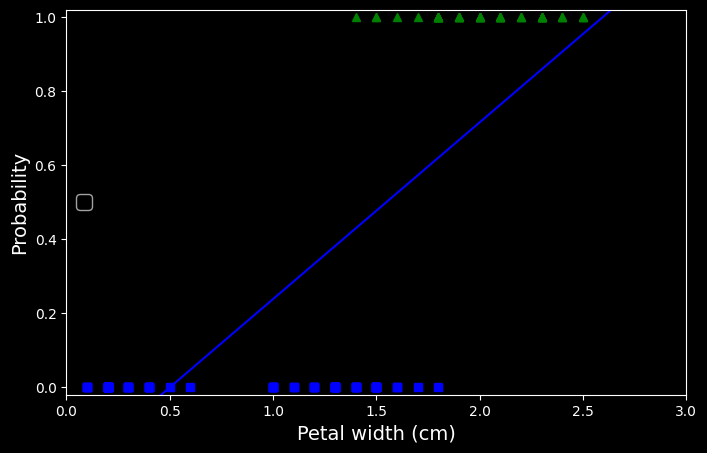

In [63]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_pred = linear_reg.predict(X_new)

plt.figure(figsize=(8, 5))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot(X_new, y_pred, c='b')


plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])

plt.show()

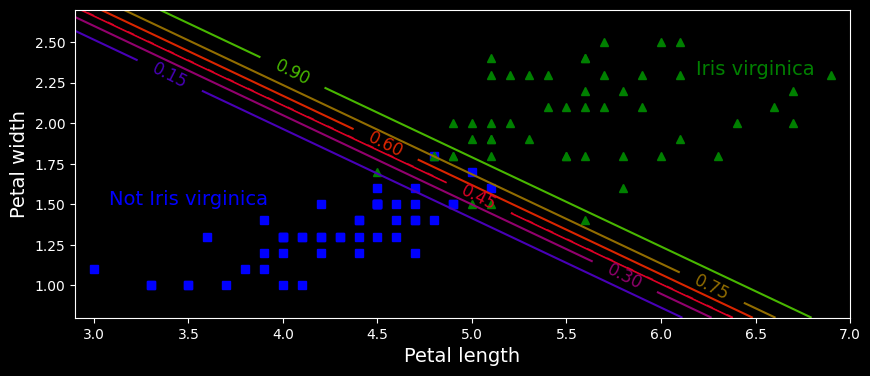

In [64]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

## Logistic Regression Modeling

/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä training accuracy : 95.52404719954201 %
Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä testing accuracy : 91.87134210394677 %
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      9982
           1       0.92      0.92      0.92     10009

    accuracy                           0.92     19991
   macro avg       0.92      0.92      0.92     19991
weighted avg       0.92      0.92      0.92     19991

--------------------------------------------------------------------------
[[9187  795]
 [ 830 9179]]
--------------------------------------------------------------------------
Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä ÏàòÌñâÏãúÍ∞Ñ :
13.531169652938843


<Figure size 2000x2000 with 0 Axes>

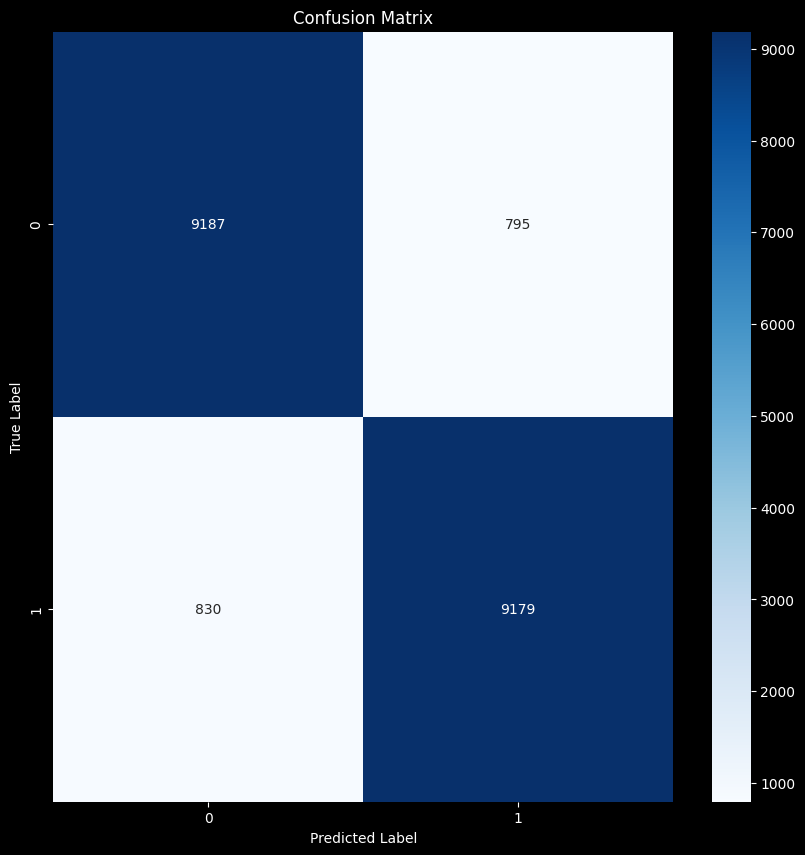

Text(0.5, 1.0, '<< Logistic Regression >>')

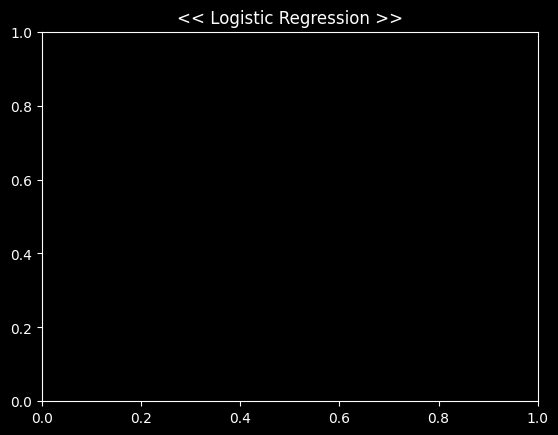

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def custom_plot_confusion_matrix(estimator, X, y_true, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, estimator.predict(X))
    classes = list(set(y_true))
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, cmap=cmap, fmt='g', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

start = time.time()
lr = LogisticRegression(C=3, max_iter=100, random_state=0)

lr.fit( train_tfidf, y_train )
lr_pred = lr.predict( test_tfidf )
lr_acc = lr.score( test_tfidf, y_test )
print("Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä training accuracy :", lr.score( train_tfidf , y_train )*100, "%")
print("Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä testing accuracy :", lr_acc * 100, "%")
print("--------------------------------------------------------------------------")
print(classification_report( y_test, lr_pred ))
print("--------------------------------------------------------------------------")
print(confusion_matrix( y_test, lr_pred ))
print("--------------------------------------------------------------------------")

end = time.time()
print('Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä ÏàòÌñâÏãúÍ∞Ñ :')
print(end - start)

plt.figure(figsize=(20, 20))
custom_plot_confusion_matrix(lr , test_tfidf , y_test , cmap='Blues')
plt.title("<< Logistic Regression >>")


Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä **training** accuracy : 95.52404719954201 %

Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä **testing** accuracy : 91.87134210394677 %

--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      9982
           1       0.92      0.92      0.92     10009

    accuracy                           0.92     19991

--------------------------------------------------------------------------
Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä ÏàòÌñâÏãúÍ∞Ñ :
13.531169652938843 sec

## Parameter Tuning

In [82]:
from sklearn.model_selection import GridSearchCV
import numpy as np

lr = LogisticRegression( random_state = 0 )

params = {'C' : [3, 3.5, 4, 4.5, 5, 6],
          'max_iter' : [10, 50, 100, 1000],
          "penalty":["l1","l2"]
          }
lr_grid_cv = GridSearchCV(lr,
                          param_grid=params,
                          cv=3,
                          scoring='accuracy',
                          verbose=1)
lr_grid_cv

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [3, 3.5, 4, 4.5, 5, 6],
                         'max_iter': [10, 50, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [83]:
import time
start = time.time()
lr_grid_cv.fit(train_tfidf, y_train)
print("Î°úÏßÄÏä§Ìã± ÏµúÏ†Å Ï†êÏàò : {}".format(lr_grid_cv.best_score_))
print("Î°úÏßÄÏä§Ìã± ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞ : {}".format(lr_grid_cv.best_params_))
print(lr_grid_cv.best_estimator_)
end = time.time()
print("--------------------------------------------------------------------")
print('Execution time is:')
print(end - start)

/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Î°úÏßÄÏä§Ìã± ÏµúÏ†Å Ï†êÏàò : 0.912704189950686
Î°úÏßÄÏä§Ìã± ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞ : {'C': 3.5, 'max_iter': 50, 'penalty': 'l2'}
LogisticRegression(C=3.5, max_iter=50, random_state=0)
--------------------------------------------------------------------
Execution time is:
644.2018070220947


/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Î°úÏßÄÏä§Ìã± ÏµúÏ†Å Ï†êÏàò : 0.912704189950686
Î°úÏßÄÏä§Ìã± ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞ : {'C': 3.5, 'max_iter': 50, 'penalty': 'l2'}

LogisticRegression(C=3.5, max_iter=50, random_state=0)

--------------------------------------------------------------------

Execution time is:
644.2018070220947 sec

## Naive Bayse

Naive Bayes training accuracy : 93.4831060989234 %
Naive Bayes testing accuracy : 91.63623630633785 %
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      9982
           1       0.92      0.91      0.92     10009

    accuracy                           0.92     19991
   macro avg       0.92      0.92      0.92     19991
weighted avg       0.92      0.92      0.92     19991

--------------------------------------------------------------------------
[[9223  759]
 [ 913 9096]]
--------------------------------------------------------------------------


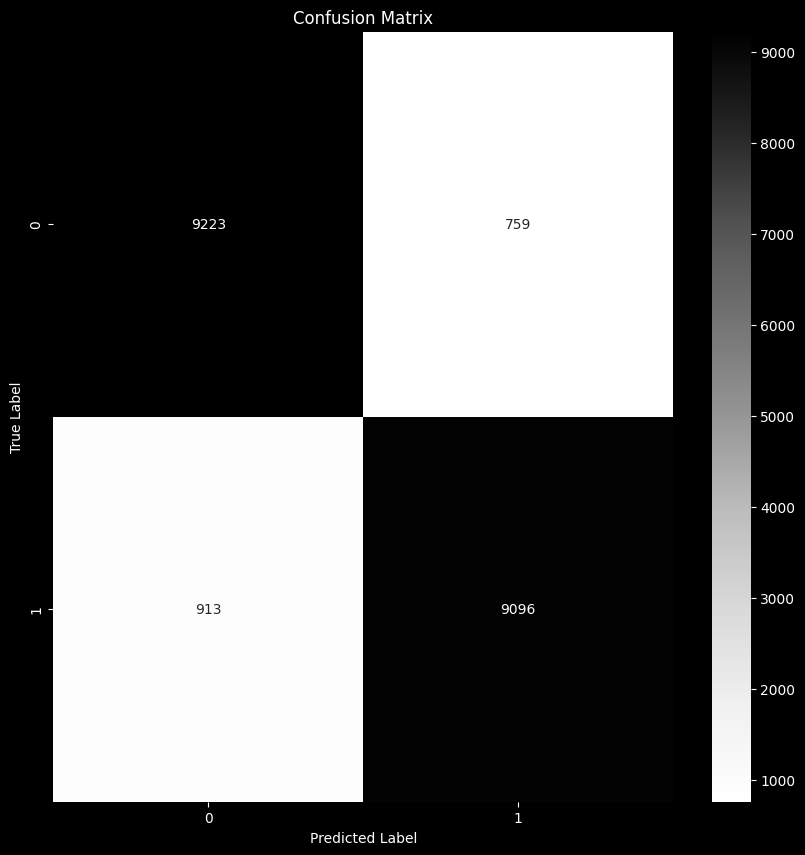

--------------------------------------------------------------------------
Execution time is:
1.8373332023620605


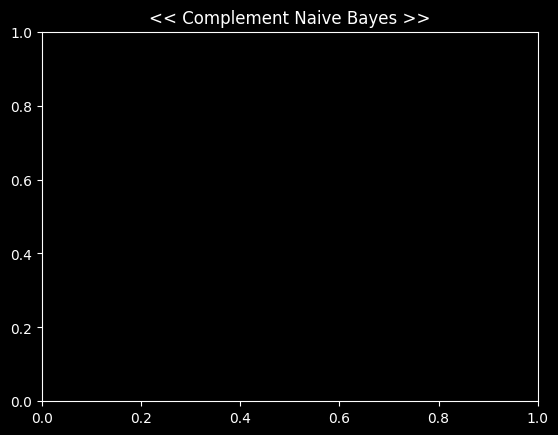

In [150]:
from sklearn.naive_bayes import ComplementNB
import matplotlib.pyplot as plt
start = time.time()
nb_clf = ComplementNB(alpha=0.8)
nb_clf.fit(train_tfidf, y_train)
nb_pred = nb_clf.predict( test_tfidf )
nb_acc = nb_clf.score( test_tfidf , y_test )
print("Naive Bayes training accuracy :", nb_clf.score( train_tfidf , y_train )*100, "%")
print("Naive Bayes testing accuracy :", nb_acc * 100, "%")
print("--------------------------------------------------------------------------")
print(classification_report(y_test, nb_pred))
print("--------------------------------------------------------------------------")
print(confusion_matrix(y_test, nb_pred))
print("--------------------------------------------------------------------------")
custom_plot_confusion_matrix(nb_clf, test_tfidf , y_test, cmap='Greys')
plt.title("<< Complement Naive Bayes >>")
end = time.time()
print("--------------------------------------------------------------------------")
print('Execution time is:')
print(end - start)

Naive Bayes training accuracy : 93.4831060989234 %
Naive Bayes testing accuracy : 91.63623630633785 %
--------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      9982
           1       0.92      0.91      0.92     10009

    accuracy                            0.92     19991
    macro avg       0.92      0.92      0.92     19991
    weighted avg    0.92      0.92      0.92     19991

--------------------------------------------------------------------------
Execution time is:
0.3729233741760254 sec

## Parameter Tuning

In [87]:
params = {'alpha': [0.3, 0.45, 0.5, 0.55, 0.8]
         }
nb_clf = ComplementNB()
nb_grid_cv = GridSearchCV(nb_clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)
import time
start = time.time()
nb_grid_cv.fit(train_tfidf, y_train)
print("ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à ÏµúÏ†Å Ï†êÏàò : {}".format(nb_grid_cv.best_score_))
print("ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞ : {}".format(nb_grid_cv.best_params_))
print(nb_grid_cv.best_estimator_)
end = time.time()
print("--------------------------------------------------------------------------")
print('Execution time is:')
print(end - start)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à ÏµúÏ†Å Ï†êÏàò : 0.9124040558166838
ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞ : {'alpha': 0.5}
ComplementNB(alpha=0.5)
--------------------------------------------------------------------------
Execution time is:
0.9669263362884521


ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à ÏµúÏ†Å Ï†êÏàò : 0.9124040558166838
ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞ : {'alpha': 0.5}

--------------------------------------------------------------------------

Execution time is:
0.9669263362884521 sec

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import time
start = time.time()
dt_clf = DecisionTreeClassifier()
dt_clf.fit( train_tfidf, y_train )
dt_clf_pred = dt_clf.predict(test_tfidf)
dt_clf_acc = dt_clf.score(test_tfidf, y_test )
print("ÏùòÏÇ¨Í≤∞Ï†ïÎÇòÎ¨¥ training accuracy  :", dt_clf.score( train_tfidf, y_train )*100, "%")
print("ÏùòÏÇ¨Í≤∞Ï†ïÎÇòÎ¨¥ test accuracy :", dt_clf_acc * 100, "%")
print("--------------------------------------------------------------------------")
print(classification_report(y_test, dt_clf_pred))
print("--------------------------------------------------------------------------")
print(confusion_matrix(y_test, dt_clf_pred))
print("--------------------------------------------------------------------------")
end = time.time()
print('Execution time is:')
print(end - start)
custom_plot_confusion_matrix(dt_clf, test_tfidf, y_test , cmap='Reds')
plt.title("<< Decision Tree >>")

## Create Accuracy Data Frame

In [88]:
import pandas as pd
models_acc = {'Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä': lr_acc*100,
              'ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à':	nb_acc*100  ,
              #'ÏùòÏÇ¨Í≤∞Ï†ïÎÇòÎ¨¥' : dt_clf_acc*100

              }
models_acc_df = pd.DataFrame(pd.Series(models_acc))
models_acc_df.columns = ['Ï†ïÌôïÎèÑ']
models_acc_df['Î™®Îç∏'] = ['Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä',
                       'ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à',
                       #'ÏùòÏÇ¨Í≤∞Ï†ïÎÇòÎ¨¥'
                       ]
models_acc_df.set_index(pd.Index([1, 2]))

Ï†ïÌôïÎèÑ       Î™®Îç∏
1  91.871342  Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä
2  91.636236  ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à

## Accuracy Bar Graph

In [89]:
import plotly.express as px
fig = px.bar(models_acc_df,
             x='Ï†ïÌôïÎèÑ',
             y='Î™®Îç∏' ,
             color='Î™®Îç∏',
             range_x=(50, 100),
             template="plotly_white",
             text_auto='.4s',
             title="<< ÏµúÏ¢Ö Î™®Îç∏ÌèâÍ∞Ä >>" )

fig.update_traces(textfont_size=15, textangle=0, textposition="inside")
fig.update_yaxes(categoryorder="total ascending")
fig.update_layout(height = 600, width = 1200, hovermode = 'closest')

In [90]:
import plotly.express as px

df = px.data.tips()
fig = px.histogram(df, x="sex", y="total_bill",
             color='smoker', barmode='group',
             histfunc='avg',
             height=400)
fig.show()

## Start precision

In [188]:
st = input("Í∞êÏÑ±ÏùÑ Î∂ÑÏÑùÌï† Î¨∏Ïû•ÏùÑ ÏûÖÎ†•ÌïòÏÑ∏Ïöî: \n")

Í∞êÏÑ±ÏùÑ Î∂ÑÏÑùÌï† Î¨∏Ïû•ÏùÑ ÏûÖÎ†•ÌïòÏÑ∏Ïöî: 
ÏßÑÏßú Ïû•ÎÇúÏπòÎÇòÏöî ÏÇ¨Ïû•Îãò ??? ÎÑàÎ¨¥ ÎßõÏûàÎäîÍ±∞ ÏïÑÎãôÎãàÍπå.. Ïà† ÏóÜÏù¥Îäî Î™ª Î≤†Í∏∞Îäî Í≥≥Ïù¥ÏóêÏöî.. ÏÇ¨Ïû•Îãò ÎØ∏Î™®ÎèÑ Î≥¥Îü¨ Í∞à Í≤∏ Îã§Îì§ Í∞ÄÏÑ∏Ïöî .. ÏÇ¨Ïû•Îãò ÎØ∏Î™®Îäî Ï†úÍ∞Ä Ïû•Îã¥Ìï©ÎãàÎã§ ... ÎßõÎèÑ ÏµúÍ≥† Í∞ÄÏÑ±ÎπÑ Í∞ì ... ÎÇ¥Ïùº Îòê Í∞ÄÍ≥†Ìîà Í≥≥


In [189]:
st = re.compile(r'[„Ñ±-„Ö£Í∞Ä-Ìû£0-9]+').findall(st)
print(st)

st = [" ".join(st)]
print(st)

['ÏßÑÏßú', 'Ïû•ÎÇúÏπòÎÇòÏöî', 'ÏÇ¨Ïû•Îãò', 'ÎÑàÎ¨¥', 'ÎßõÏûàÎäîÍ±∞', 'ÏïÑÎãôÎãàÍπå', 'Ïà†', 'ÏóÜÏù¥Îäî', 'Î™ª', 'Î≤†Í∏∞Îäî', 'Í≥≥Ïù¥ÏóêÏöî', 'ÏÇ¨Ïû•Îãò', 'ÎØ∏Î™®ÎèÑ', 'Î≥¥Îü¨', 'Í∞à', 'Í≤∏', 'Îã§Îì§', 'Í∞ÄÏÑ∏Ïöî', 'ÏÇ¨Ïû•Îãò', 'ÎØ∏Î™®Îäî', 'Ï†úÍ∞Ä', 'Ïû•Îã¥Ìï©ÎãàÎã§', 'ÎßõÎèÑ', 'ÏµúÍ≥†', 'Í∞ÄÏÑ±ÎπÑ', 'Í∞ì', 'ÎÇ¥Ïùº', 'Îòê', 'Í∞ÄÍ≥†Ìîà', 'Í≥≥']
['ÏßÑÏßú Ïû•ÎÇúÏπòÎÇòÏöî ÏÇ¨Ïû•Îãò ÎÑàÎ¨¥ ÎßõÏûàÎäîÍ±∞ ÏïÑÎãôÎãàÍπå Ïà† ÏóÜÏù¥Îäî Î™ª Î≤†Í∏∞Îäî Í≥≥Ïù¥ÏóêÏöî ÏÇ¨Ïû•Îãò ÎØ∏Î™®ÎèÑ Î≥¥Îü¨ Í∞à Í≤∏ Îã§Îì§ Í∞ÄÏÑ∏Ïöî ÏÇ¨Ïû•Îãò ÎØ∏Î™®Îäî Ï†úÍ∞Ä Ïû•Îã¥Ìï©ÎãàÎã§ ÎßõÎèÑ ÏµúÍ≥† Í∞ÄÏÑ±ÎπÑ Í∞ì ÎÇ¥Ïùº Îòê Í∞ÄÍ≥†Ìîà Í≥≥']


In [190]:
st_tfidf = tfidf.transform(st)
st_tfidf

<1x197019 sparse matrix of type '<class 'numpy.float64'>'
	with 41 stored elements in Compressed Sparse Row format>

In [191]:
st_predict = lr_grid_cv.best_estimator_.predict(st_tfidf)
st_predict

array([1])

In [192]:
if(st_predict ==0):
    print(st, "->> Î∂ÄÏ†ï Í∞êÏÑ±")
else:
    print(st, "->> Í∏çÏ†ï Í∞êÏÑ±")

['ÏßÑÏßú Ïû•ÎÇúÏπòÎÇòÏöî ÏÇ¨Ïû•Îãò ÎÑàÎ¨¥ ÎßõÏûàÎäîÍ±∞ ÏïÑÎãôÎãàÍπå Ïà† ÏóÜÏù¥Îäî Î™ª Î≤†Í∏∞Îäî Í≥≥Ïù¥ÏóêÏöî ÏÇ¨Ïû•Îãò ÎØ∏Î™®ÎèÑ Î≥¥Îü¨ Í∞à Í≤∏ Îã§Îì§ Í∞ÄÏÑ∏Ïöî ÏÇ¨Ïû•Îãò ÎØ∏Î™®Îäî Ï†úÍ∞Ä Ïû•Îã¥Ìï©ÎãàÎã§ ÎßõÎèÑ ÏµúÍ≥† Í∞ÄÏÑ±ÎπÑ Í∞ì ÎÇ¥Ïùº Îòê Í∞ÄÍ≥†Ìîà Í≥≥'] ->> Í∏çÏ†ï Í∞êÏÑ±


In [193]:
st_transformed = tfidf.transform(st)
st_prediction = lr_grid_cv.best_estimator_.predict(st_transformed)
st_probabilities = lr_grid_cv.best_estimator_.predict_proba(st_transformed)

print(f"ÏòàÏ∏° ÌÅ¥ÎûòÏä§: {st_prediction[0]}")
print(f"ÌÅ¥ÎûòÏä§ ÌôïÎ•†: {st_probabilities[0]}")


ÏòàÏ∏° ÌÅ¥ÎûòÏä§: 1
ÌÅ¥ÎûòÏä§ ÌôïÎ•†: [0.14538362 0.85461638]


In [197]:
st_transformed = tfidf.transform(st)
token_coeff_pairs = [(tfidf.get_feature_names_out()[index], lr_grid_cv.best_estimator_.coef_[0][index]) for index in non_zero_indices]
sorted_token_coeff_pairs = sorted(token_coeff_pairs, key=lambda x: x[1], reverse=True)

print("Í∏çÏ†ïÏ†ÅÏóê ÏòÅÌñ•ÏùÑ Ï£ºÎäî ÌÜ†ÌÅ∞ ÏÉÅÏúÑ 5Í∞ú:")
for token, coef in sorted_token_coeff_pairs[:5]:
    print(f"{token}: {coef}")

print("\nÎ∂ÄÏ†ïÏ†ÅÏóê ÏòÅÌñ•ÏùÑ Ï£ºÎäî ÌÜ†ÌÅ∞ ÏÉÅÏúÑ 5Í∞ú:")
for token, coef in sorted_token_coeff_pairs[-5:]:
    print(f"{token}: {coef}")


Í∏çÏ†ïÏ†ÅÏóê ÏòÅÌñ•ÏùÑ Ï£ºÎäî ÌÜ†ÌÅ∞ ÏÉÅÏúÑ 5Í∞ú:
ÏµúÍ≥†: 9.60346098923878
Í∞ÄÏÑ±: 4.380648605959796
ÎÇ¥Ïùº: 2.8612561663994938
Í≤∏: 2.4966741322304014
Í∞ÄÏÑ± ÎπÑ: 2.322054266549621

Î∂ÄÏ†ïÏ†ÅÏóê ÏòÅÌñ•ÏùÑ Ï£ºÎäî ÌÜ†ÌÅ∞ ÏÉÅÏúÑ 5Í∞ú:
Îäî: -1.7689250784290118
ÎπÑ: -1.8283411189062218
Ïà†: -2.0135757992117775
ÎÑàÎ¨¥: -4.8127718248940115
Î™ª: -7.204901977279271
